**StatDa, Statistische Datenanalyse, DS-C-SD001.StatDa.ZH-Sa-1.PVA.FS23**

# Semesterarbeit - Statistische Datenanalyse

**CAS Statistische Datenanalyse und Datenvisualisierung, FS23**  
**Fernfachhochschule Schweiz (FFHS)**

Basel, 23.06.2023

**Cyrill Martin**  
Matrikel-Nr. 02-909-323   
cyrill.martin@students.ffhs.ch

**Inhaltsverzeichnis**<a id='toc0_'></a>       
- [Einleitung](#toc1_1_)    
  - [Ausgangslage](#toc1_1_1_)    
  - [Daten](#toc1_1_2_)    
    - [Datenquellen und -verarbeitung](#toc1_1_2_1_)    
    - [Variabeln](#toc1_1_2_2_)    
  - [R-Bibliotheken](#toc1_1_3_)    
- [Deskriptive Datenanalyse](#toc1_2_)    
  - ["Summary"](#toc1_2_1_)    
  - [Verteilungen](#toc1_2_2_)    
    - [Projektdauer in Jahren (GrantDurationYears)](#toc1_2_2_1_)    
    - [Totaler Förderungsbetrag (AmountGrantedAllSets)](#toc1_2_2_2_)    
    - [Förderungsbetrag pro Jahr (AmountPerYear)](#toc1_2_2_3_)    
    - [Totale Anzahl Publikationen (NrCitablePublications)](#toc1_2_2_4_)    
    - [Anzahl Publikationen pro Jahr (NrCitablePublicationsPerYear)](#toc1_2_2_5_)    
    - [Totale Anzahl Zitierungen (NrCitationsTotal)](#toc1_2_2_6_)    
    - [Anzahl Zitierungen pro Publikation (NrCitationsPerPublication)](#toc1_2_2_7_)    
    - [Genereller Umgang mit Ausreissern](#toc1_2_2_8_)    
    - [Förderungsinstrument](#toc1_2_2_9_)    
    - [Forschungsgebiete](#toc1_2_2_10_)    
  - ["Summary" der log-transformierten Daten](#toc1_2_3_)    
  - [Korrelationsmatrix](#toc1_2_4_)    
  - [Pairs](#toc1_2_5_)    
- [Multiple lineare Regression](#toc1_3_)    
  - [Theoretische Fundierung](#toc1_3_1_)    
  - [Auswertung](#toc1_3_2_)    
  - [Interpretation](#toc1_3_3_)    
- [Varianzanalyse](#toc1_4_)    
  - [Theoretische Fundierung](#toc1_4_1_)    
  - [Auswertung](#toc1_4_2_)    
  - [Interpretation](#toc1_4_3_)    
- [Logistische Regression](#toc1_5_)    
  - [Theoretische Fundierung](#toc1_5_1_)    
  - [Auswertung](#toc1_5_2_)    
  - [Interpretation](#toc1_5_3_)    
- [Zusammenfassung](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Einleitung](#toc0_)

### <a id='toc1_1_1_'></a>[Ausgangslage](#toc0_)
Die vorliegende Semesterarbeit entstand im Rahmen einer wiederkehrenden Zusammenarbeit mit einem Wissenschaftsverlag, der sich auf die Veröffentlichung biomedizinischer Inhalte spezialisiert hat. Im Zuge dieser Zusammenarbeit habe ich Daten zu Forschungsprojekten verarbeitet, die durch den Schweizerischen Nationalfonds (SNF) unterstützt wurden. Zusätzlich dazu habe ich Daten zur Anzahl der Zitierungen wissenschaftlicher Publikationen besorgt, die im Rahmen dieser Projekte veröffentlicht wurden. Dadurch wurde die übergeordnete Frage aufgeworfen, ob Projekte, die eine höhere finanzielle Unterstützung erhalten, auch vermeintlich relevantere Publikationen hervorbringen, die dementsprechend häufiger zitiert werden.

- Das Jupyter Notebook der kompletten Datenanalyse sowie der dazugehörige Datensatz sind ebenfalls auf GitHub verfügbar: [data/analysis](https://github.com/cyrill-martin/money-and-citations/tree/main/data/analysis)
- Eine Google-Colab-Version des Notebooks ist hier verfügbar: [Google Colab](https://colab.research.google.com/drive/1ipVo4bXMbPXfXMS3_L6cCejVcXiE4R7M#scrollTo=d91f0b6f)

### <a id='toc1_1_2_'></a>[Daten](#toc0_)

#### <a id='toc1_1_2_1_'></a>[Datenquellen und -verarbeitung](#toc0_)
Der verwendete Datensatz basiert auf zwei verschiedenen Datenquellen:

- Die Informationen zu den Forschungsprojekten und den daraus resultierenden wissenschaftlichen Publikationen wurden vom [SNF-Datenportal](https://data.snf.ch/datasets) heruntergeladen. Der letzte Download fand am 16.05.2023 statt.
- Die Angaben zur Anzahl der Zitierungen für jede einzelne Publikation wurden über die [Crossref Cited-by API](https://www.crossref.org/documentation/cited-by/retrieve-citations/) bezogen. Der Datensatz wurde zuletzt in der Nacht vom 16.05.2023 auf den 17.05.2023 abgerufen.

Die Datenverarbeitung, einschliesslich des Bezugs der Zitierungsinformationen, erfolgte mithilfe von R-Code, der in vier aufeinanderfolgenden Jupyter Notebooks ausgeführt wurde. 
- Alle Verarbeitungsschritte können hier auf GitHub eingesehen werden: [data/tidy](https://github.com/cyrill-martin/money-and-citations/tree/main/data/tidy)

Für die Analyse wurden die Daten auf Projekte mit bestimmten Merkmalen beschränkt:
- Es wurden nur abgeschlossene Projekte berücksichtigt.
- Es wurden nur Projekte einbezogen, deren Fördermittel ab dem Jahr 2012 bewilligt wurden.
- Es wurden nur Projekte im Bereich der biomedizinischen Forschung einbezogen.
- Es wurden nur Projekte berücksichtigt, die mindestens eine wissenschaftliche Publikation generiert haben.
- Es wurden nur Projekte einbezogen, für die ich Daten zu den Zitierungen abrufen konnte und deren wissenschaftliche Publikationen insgesamt mindestens eine Zitierung erhalten haben.

Dadurch entstand ein Datensatz mit insgesamt 1'923 Forschungsprojekten.

#### <a id='toc1_1_2_2_'></a>[Variabeln](#toc0_)

Die wesentlichen Variablen im Datensatz, die für die Analyse relevant sind, werden in der folgenden Tabelle kurz beschrieben. Um Projekte unterschiedlicher Dauer besser vergleichen zu können, wurden für die gewährten Gelder und die Anzahl veröffentlichter Publikationen Durchschnittswerte pro Jahr berechnet. Darüber hinaus wurde für die Anzahl der Zitierungen der Durchschnitt der Zitierungen pro Publikation ermittelt.

| Variable                      | Beschreibung                                                                                      |
|-------------------------------|---------------------------------------------------------------------------------------------------|
| GrantDurationYears            | Die Dauer des Projekts in Jahren.                                                                 |
| AmountGrantedAllSets          | Der insgesamt gewährte Förderungsbetrag für das Projekt.                                          |
| AmountPerYear                 | Der durchschnittliche Förderungsbetrag pro Jahr.                                                  |
| FundingInstrumentLevel1       | Das Förderungsinstrument, innerhalb dessen die Gelder gewährt wurden.                             |
| MainDiscipline_Level2         | Das Forschungsgebiet eines Projekts.                                                              |
| NrCitablePublications         | Die Gesamtanzahl veröffentlichter Publikationen.                                                  |
| NrCitablePublicationsPerYear  | Die durchschnittliche Anzahl veröffentlichter Publikationen pro Jahr.                             |
| NrCitationsTotal              | Die Gesamtanzahl der Zitierungen aller Publikationen eines Projekts.                              |
| NrCitationsPerPublication     | Die durchschnittliche Anzahl der Zitierungen pro Publikation, die ein Projekt veröffentlicht hat. |

### <a id='toc1_1_3_'></a>[R-Bibliotheken](#toc0_)
Nachfolgend werden die R-Bibliotheken geladen, die für die Auswertungen relevant sind.

In [ ]:
library(tidyverse)
library(gridExtra)
library(ggpubr)
library(psych)
library(car)
library(lmtest)

## <a id='toc1_2_'></a>[Deskriptive Datenanalyse](#toc0_)

Im ersten Kapitel der Arbeit sollen die Daten beschrieben und zusammengefasst werden. Es werden erste Muster, Trends und Zusammenhänge aufgezeigt, ohne dabei detaillierte statistische Auswertungen vorzunehmen.

In [ ]:
# Daten importieren
data <- read_delim("BiomedGrants_20230601.csv", delim=";", col_names=TRUE, col_select=c(
  "GrantDurationYears",
  "AmountGrantedAllSets",
  "AmountPerYear",
  "FundingInstrumentLevel1",
  "MainDiscipline_Level2",
  "NrCitablePublications",
  "NrCitablePublicationsPerYear",
  "NrCitationsTotal",
  "NrCitationsPerPublication"
))

In [796]:
# Factors generieren für die kategorialen Variabeln
cols <- c(
    "FundingInstrumentLevel1",
    "MainDiscipline_Level2"
)

data[, cols] <- lapply(data[, cols], as.factor)

In [797]:
# Sicherstellen, dass immer alle Spalten eines Dataframes angezeigt werden
options(repr.matrix.max.rows=Inf, repr.matrix.max.cols=Inf)

In [798]:
# Ein Blick in den Datensatz
dim(data)
head(data)

[1] 1923    9

GrantDurationYears,AmountGrantedAllSets,AmountPerYear,FundingInstrumentLevel1,MainDiscipline_Level2,NrCitablePublications,NrCitablePublicationsPerYear,NrCitationsTotal,NrCitationsPerPublication
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
4.4958904,291191,64768.26,Projects,Preventive Medicine,3,0.6672761,145,48.33333
4.9232877,640027,129999.92,Programmes,Social Medicine,7,1.4218141,89,12.71429
0.9972603,42800,42917.58,Careers,Basic Medical Sciences,1,1.0027473,146,146.00000
2.9972603,570301,190274.10,Projects,Experimental Medicine,6,2.0018282,940,156.66667
2.9972603,593352,197964.79,Careers,Clinical Medicine,10,3.3363803,242,24.20000
1.9972603,100000,50068.59,Careers,Basic Medical Sciences,4,2.0027435,214,53.50000


### <a id='toc1_2_1_'></a>["Summary"](#toc0_)

In einem ersten Schritt soll ein allgemeiner Überblick über jede Spalte im Datensatz gewonnen werden.

In [799]:
summary(data)

 GrantDurationYears AmountGrantedAllSets AmountPerYear              FundingInstrumentLevel1
 Min.   :0.08219    Min.   :    1500     Min.   :   4387   Careers              : 631      
 1st Qu.:1.78904    1st Qu.:  131464     1st Qu.:  72529   Infrastructure       :  28      
 Median :3.00000    Median :  387326     Median : 118500   Programmes           : 185      
 Mean   :2.83549    Mean   :  451050     Mean   : 147089   Projects             :1042      
 3rd Qu.:3.74795    3rd Qu.:  598508     3rd Qu.: 175000   Science communication:  37      
 Max.   :6.91507    Max.   :10528000     Max.   :2632000                                   
            MainDiscipline_Level2 NrCitablePublications NrCitablePublicationsPerYear NrCitationsTotal 
 Basic Medical Sciences:658       Min.   :  1.000       Min.   : 0.1714              Min.   :    1.0  
 Clinical Medicine     :463       1st Qu.:  2.000       1st Qu.: 1.0000              1st Qu.:   36.0  
 Experimental Medicine :586       Median :  5.0

Bei Betrachtung der "Summary" ist ersichtlich, dass das allgemeine Förderungsinstrument "Projects" die Daten dominiert. Zudem sind die Forschungsgebiete "Social Medicine" und "Preventive Medicine" vergleichsweise unterrepräsentiert, was darauf hindeutet, dass in diesen Bereichen weniger Forschung betrieben wird.

Die Spannweiten der metrischen Variablen sind relativ gross, wobei sich zwischen dem 3. Quantil und dem Maximalwert teilweise erhebliche Abstände befinden. Die Verteilung der Daten ist eher schief, anstatt normalverteilt. Im nächsten Abschnitt wird eine detailliertere Untersuchung der Verteilungen der Daten durchgeführt.

### <a id='toc1_2_2_'></a>[Verteilungen](#toc0_)

In [800]:
# Eine Funktion, um pro gewünschter Spalte ein Histogramm, ein QQ-Plot und ein Boxplot zu generieren. Mit der Option zur log-Transformation der Spalte.
show_plots <- function(data=data, column=column, variable=variable, bins, log=FALSE) {

    if (log) {
        title <- paste("log(", variable, ")", sep="")

        hist_plot <- ggplot(data=data, aes(x=log(!!sym(variable))))
        qq_plot <- ggqqplot(log(column), title=paste("QQ plot of", title, sep=" "))
        boxplot_plot <- ggplot(data=data, aes(x="", y=log(!!sym(variable))))

        whisker_range <- 1.5 * IQR(log(column))
        lower_whisker <- quantile(log(column), 0.25) - whisker_range
        upper_whisker <- quantile(log(column), 0.75) + whisker_range

        smry <- summary(log(column))
    } else {
        title <- variable

        hist_plot <- ggplot(data=data, aes(x=!!sym(variable)))
        qq_plot <- ggqqplot(column, title=paste("QQ plot of", title, sep=" "))
        boxplot_plot <- ggplot(data=data, aes(x="", y=!!sym(variable)))

        whisker_range <- 1.5 * IQR(column)
        lower_whisker <- quantile(column, 0.25) - whisker_range
        upper_whisker <- quantile(column, 0.75) + whisker_range

        smry <- summary(column)
    }
    
    # Final histogram
    hist_plot <- hist_plot + 
        geom_histogram(bins=bins) +
        theme_light() +
        ggtitle(paste("Histogram of", title, sep=" ")) +
        theme(plot.title=element_text(hjust=0.5))

    # Final qq plot
    qq_plot <- qq_plot +
        theme(plot.title=element_text(hjust=0.5))

    # Final boxplot
    boxplot_plot <- boxplot_plot + 
        geom_jitter(width=0.2, alpha=0.25, height=0.05) +
        geom_errorbar(aes(ymin=lower_whisker, ymax=upper_whisker), width=0.2) +
        geom_boxplot(coef=1.5, outlier.shape=NA) +
        ggtitle(paste("Boxplot of", title, sep=" ")) +
        theme(axis.ticks.x=element_blank(),
            axis.text.x=element_blank(),
            panel.background=element_rect(fill="white"),
            panel.grid.major.y=element_line(colour="lightgrey"),
            panel.grid.minor.y=element_line(colour="lightgrey"),
            plot.title=element_text(hjust=0.5)
           )
        
    # Print summary of column
    print(smry)

    options(repr.plot.width=18, repr.plot.height=6)
    grid.arrange(hist_plot, qq_plot, boxplot_plot, ncol=3)
}

#### <a id='toc1_2_2_1_'></a>[Projektdauer in Jahren (GrantDurationYears)](#toc0_)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.08219 1.78904 3.00000 2.83549 3.74795 6.91507 


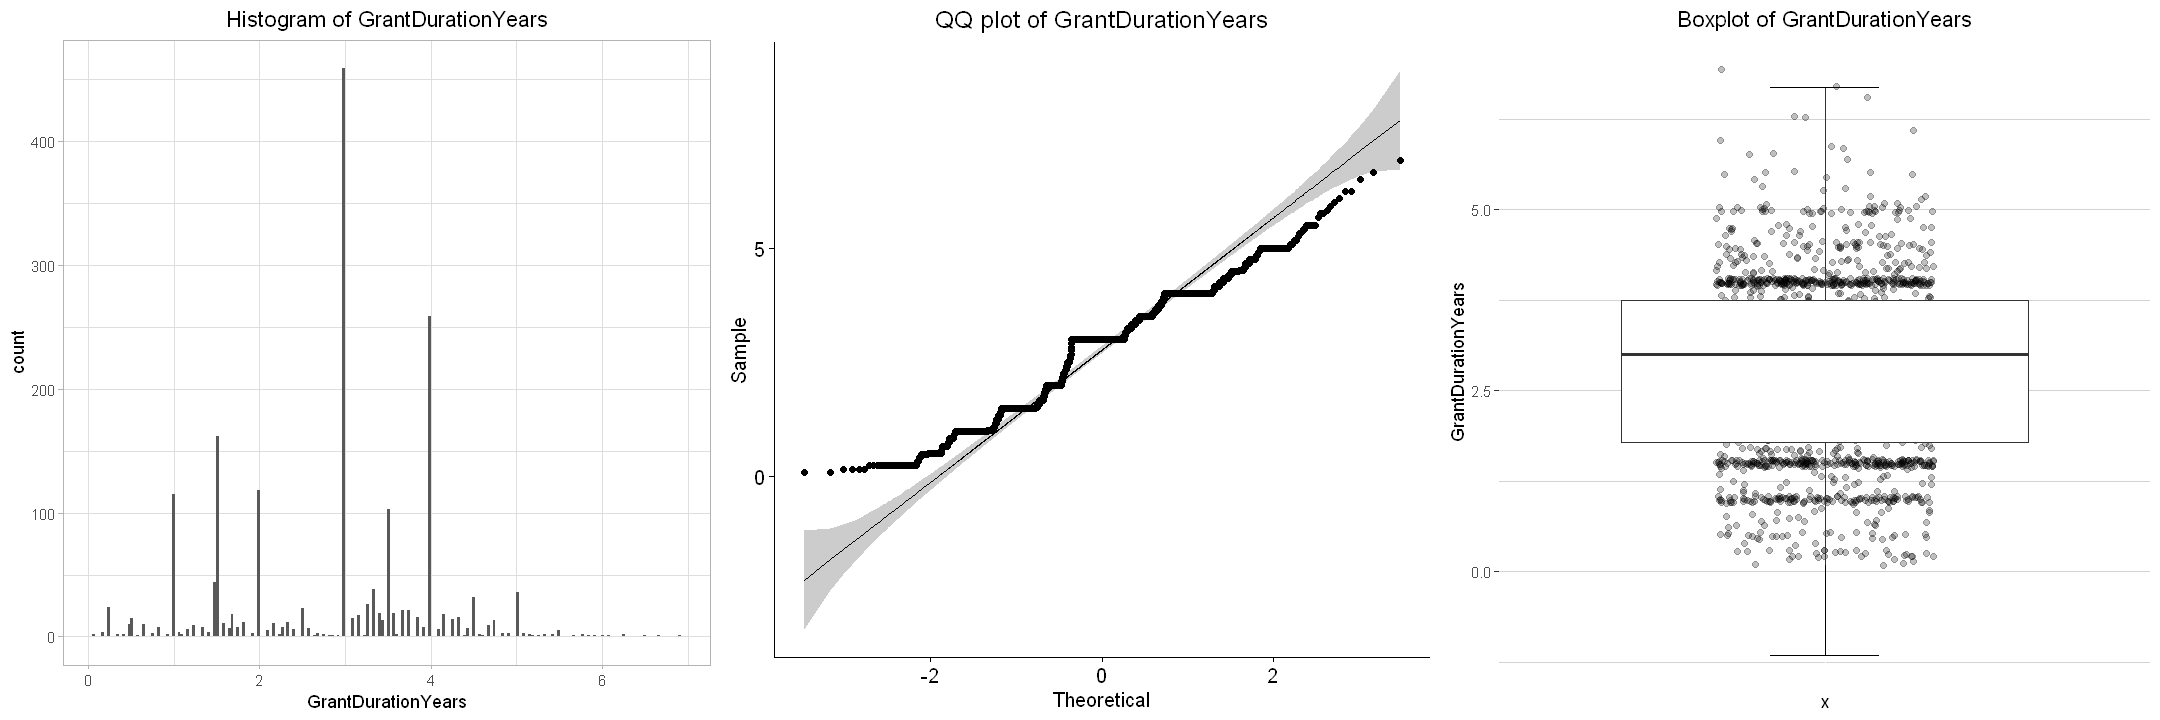

In [801]:
show_plots(data=data, column=data$GrantDurationYears, variable="GrantDurationYears", bins=200, log=FALSE)

Die Daten zur Projektdauer weisen keine vollständig schiefe oder normalverteilte Verteilung auf. Die Mehrheit der Projekte hat eine Dauer von ungefähr drei Jahren. Es sind kaum signifikante Ausreisser vorhanden, abgesehen von einem einzigen Datenpunkt.

#### <a id='toc1_2_2_2_'></a>[Gesamter Förderungsbetrag (AmountGrantedAllSets)](#toc0_)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1500   131464   387326   451050   598508 10528000 


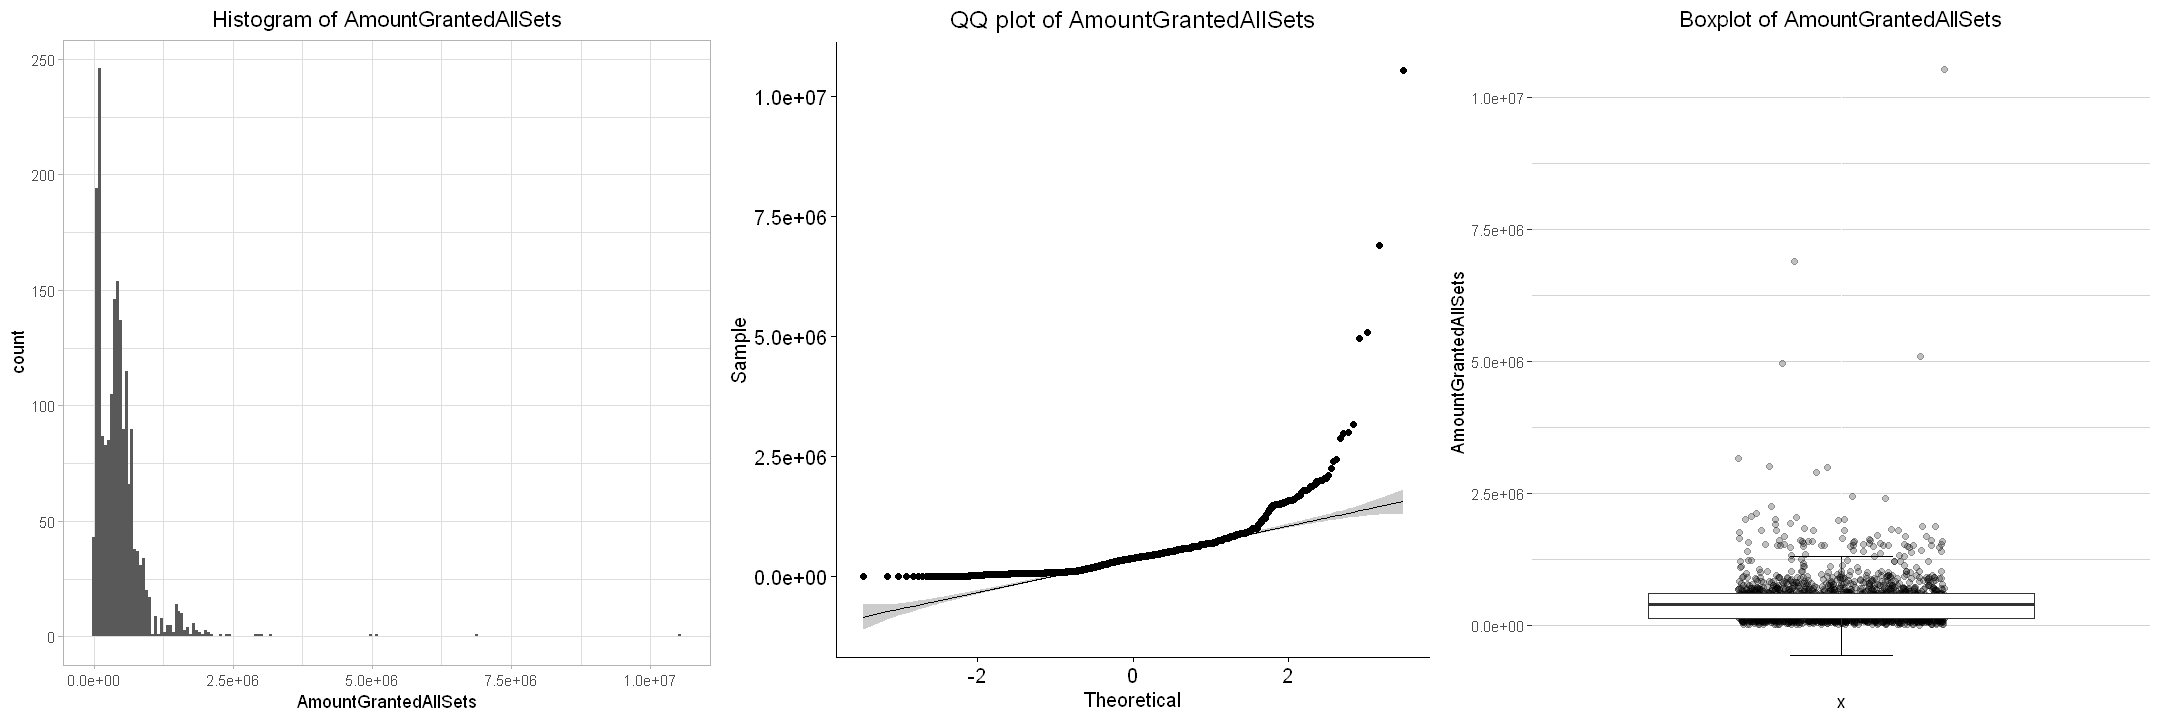

In [699]:
show_plots(data=data, column=data$AmountGrantedAllSets, variable="AmountGrantedAllSets", bins=200, log=FALSE)

Mit log-Transformation:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.313  11.786  12.867  12.587  13.302  16.170 


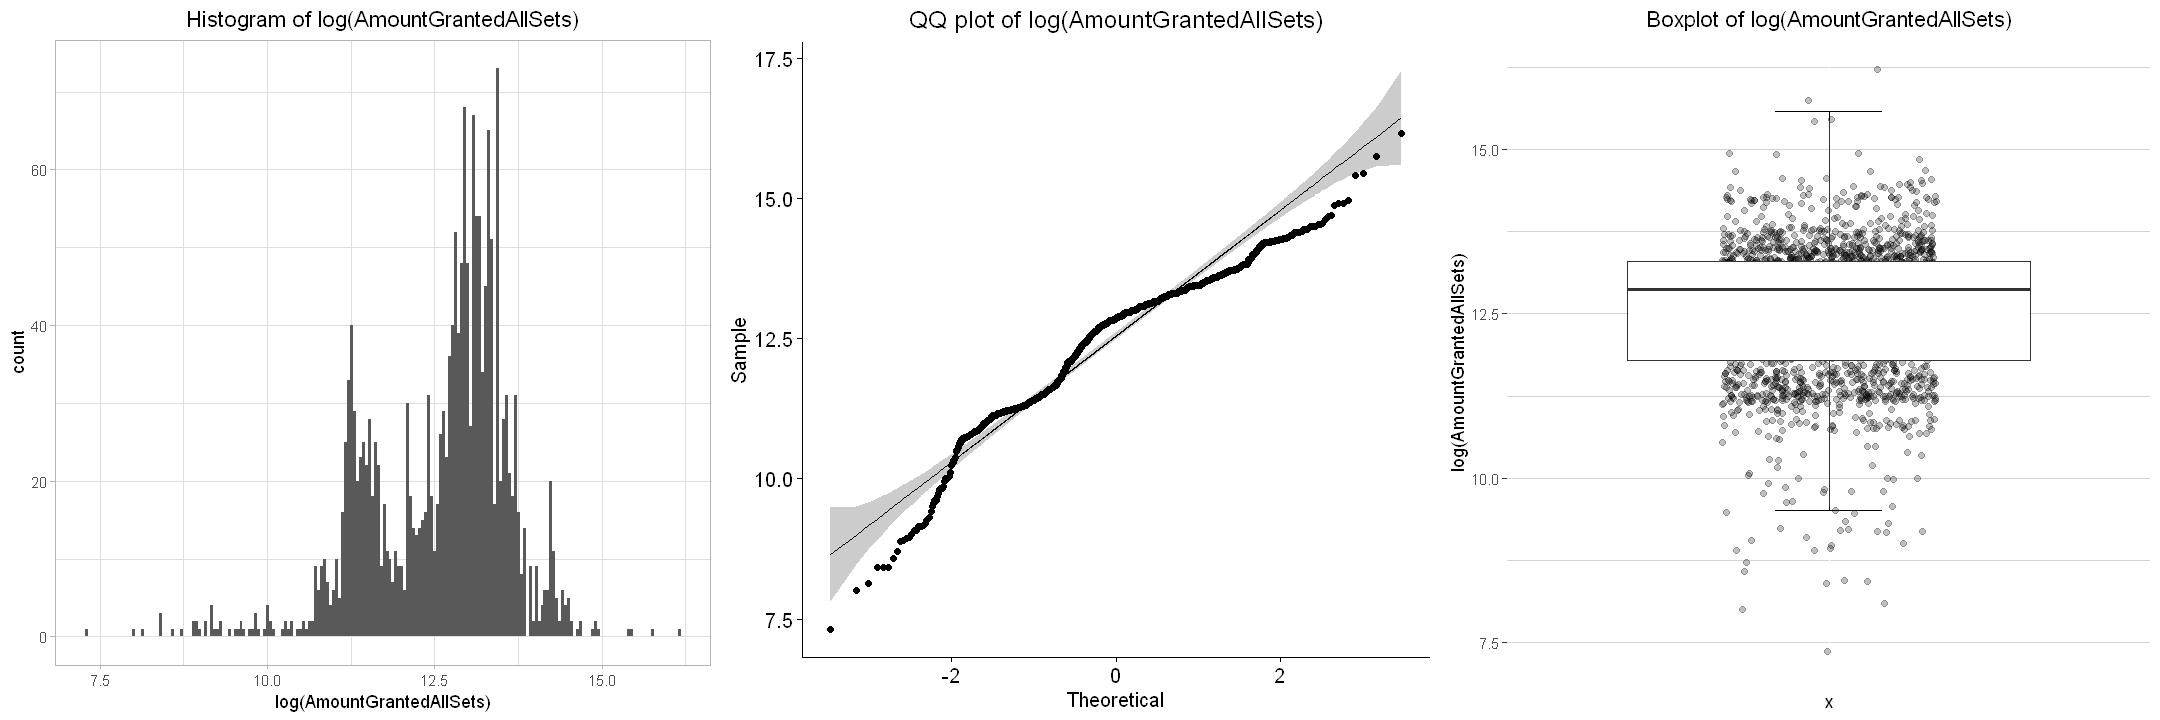

In [702]:
show_plots(data=data, column=data$AmountGrantedAllSets, variable="AmountGrantedAllSets", bins=200, log=TRUE)

Die log-transformierten Daten weisen eine etwas gleichmässigere Verteilung auf, obwohl sie immer noch nicht normal verteilt sind. Nach der Transformation sind immer noch einige Ausreisser vorhanden, insbesondere im Bereich der niedrigen Werte.

#### <a id='toc1_2_2_3_'></a>[Förderungsbetrag pro Jahr (AmountPerYear)](#toc0_)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4387   72529  118500  147089  175000 2632000 


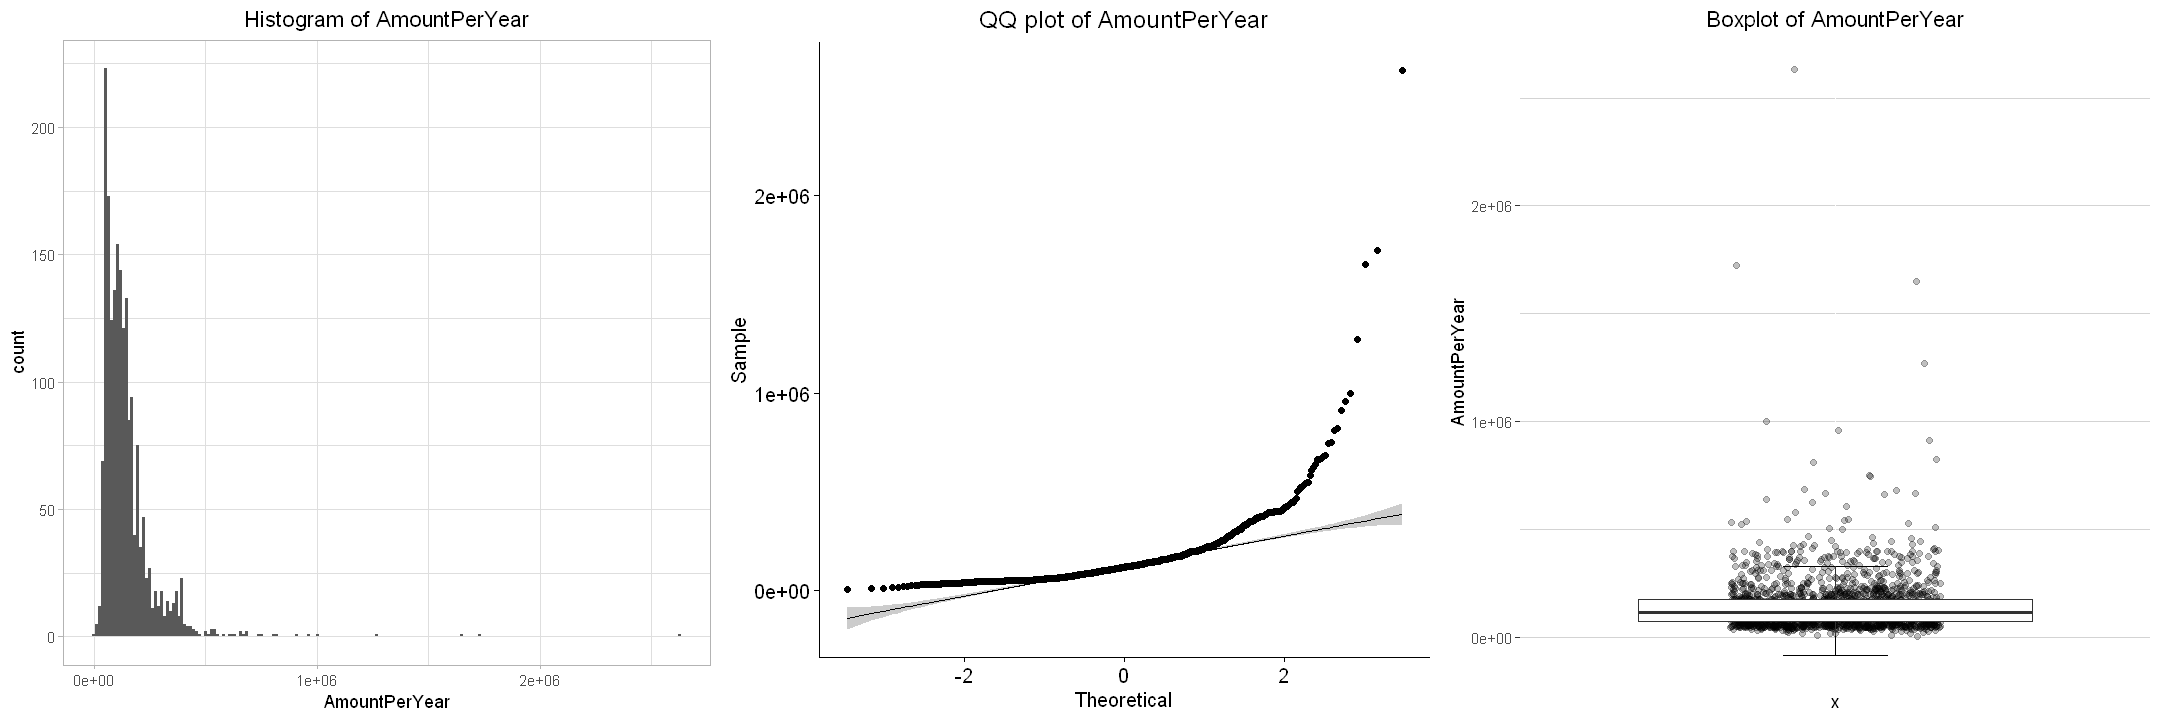

In [703]:
show_plots(data=data, column=data$AmountPerYear, variable="AmountPerYear", bins=200, log=FALSE)

Mit log-Transformation:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.386  11.192  11.683  11.675  12.073  14.783 


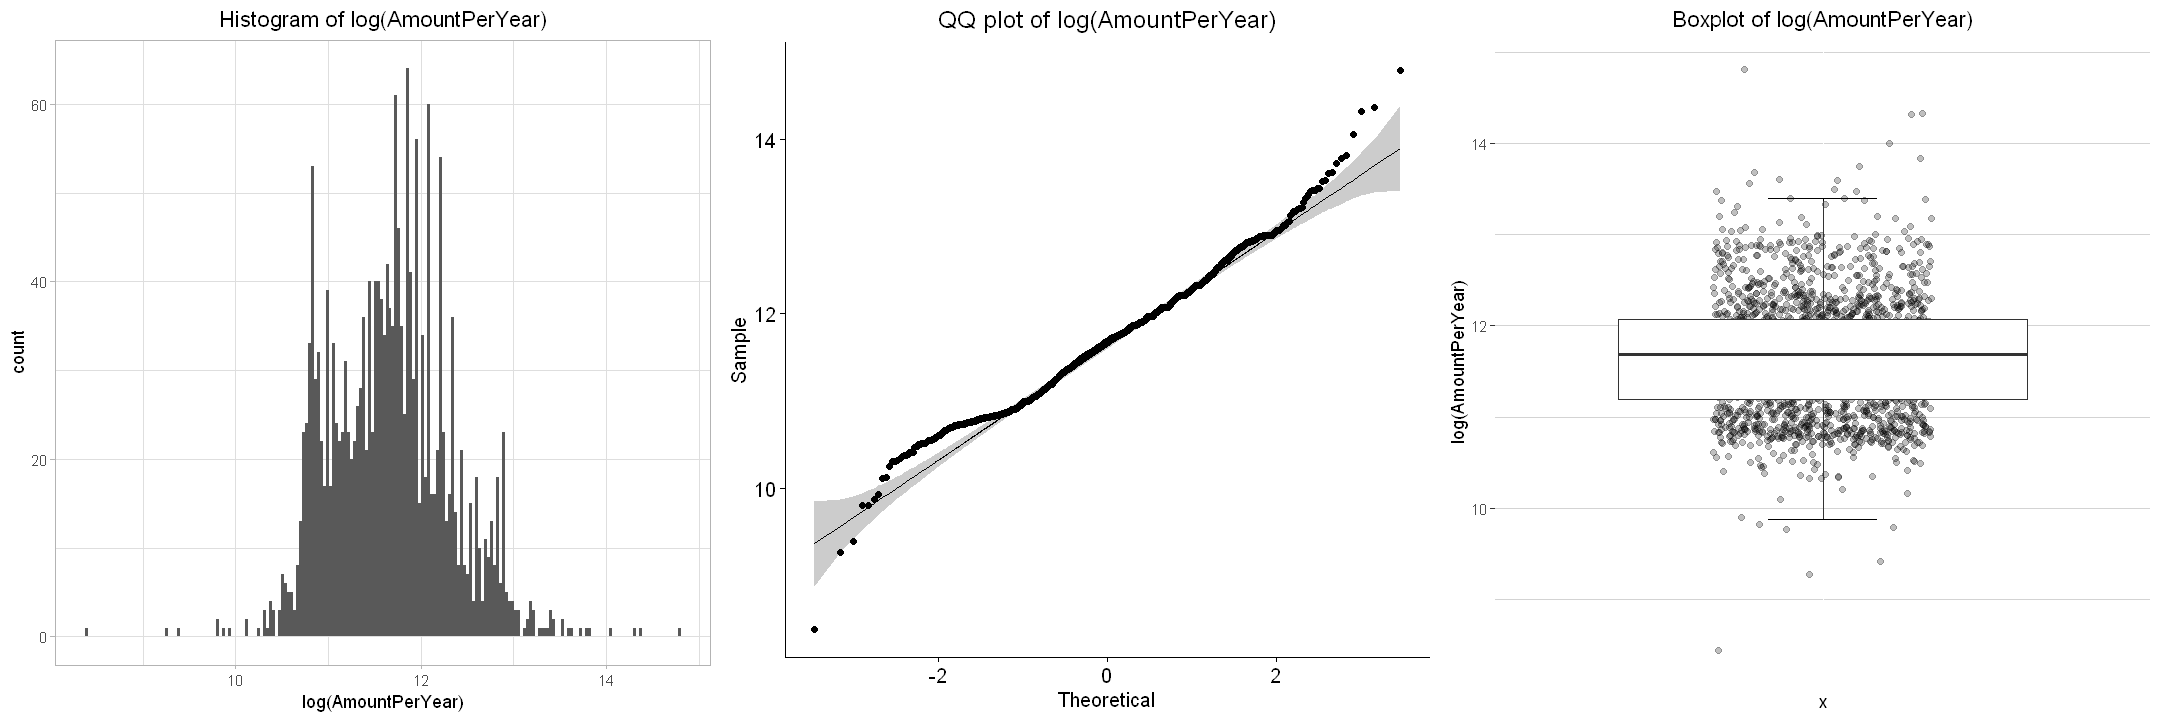

In [704]:
show_plots(data=data, column=data$AmountPerYear, variable="AmountPerYear", bins=200, log=TRUE)

Die log-transformierten Beträge pro Jahr zeigen eine verbesserte Verteilung, weichen jedoch in Richtung der Ränder von einer optimalen Normalverteilung ab. Es sind einige Ausreisser sowohl nach oben als auch nach unten vorhanden.

#### <a id='toc1_2_2_4_'></a>[Totale Anzahl Publikationen (NrCitablePublications)](#toc0_)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.827  10.000 235.000 


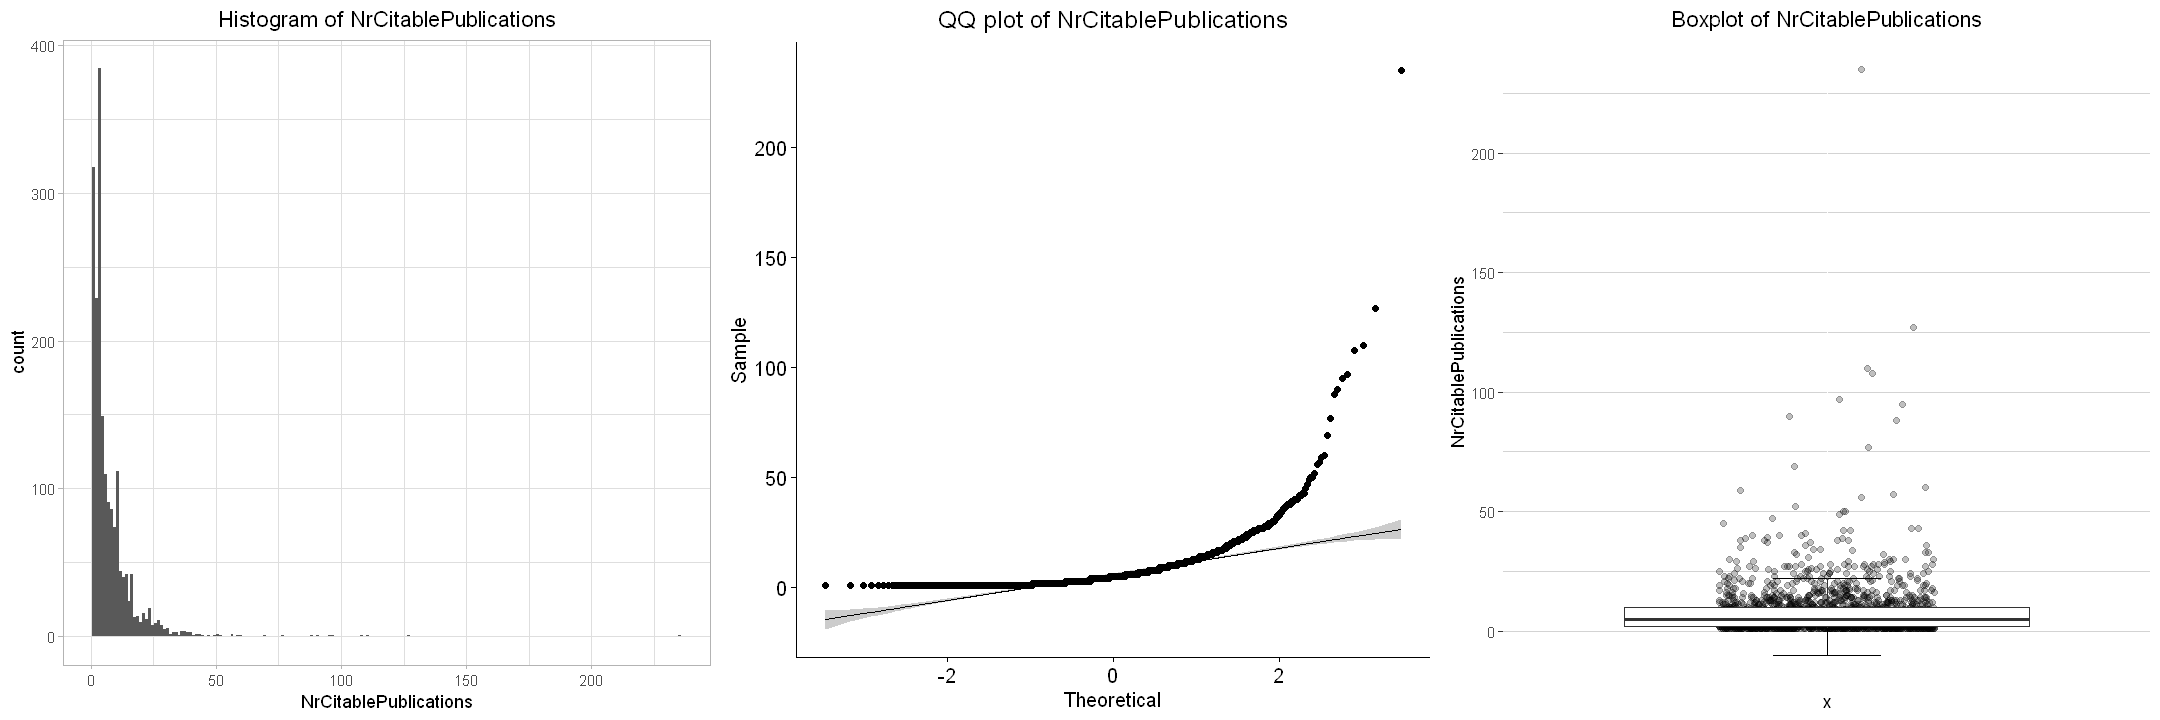

In [705]:
show_plots(data=data, column=data$NrCitablePublications, variable="NrCitablePublications", bins=200, log=FALSE)

Mit log-Transformation:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.6931  1.6094  1.5347  2.3026  5.4596 


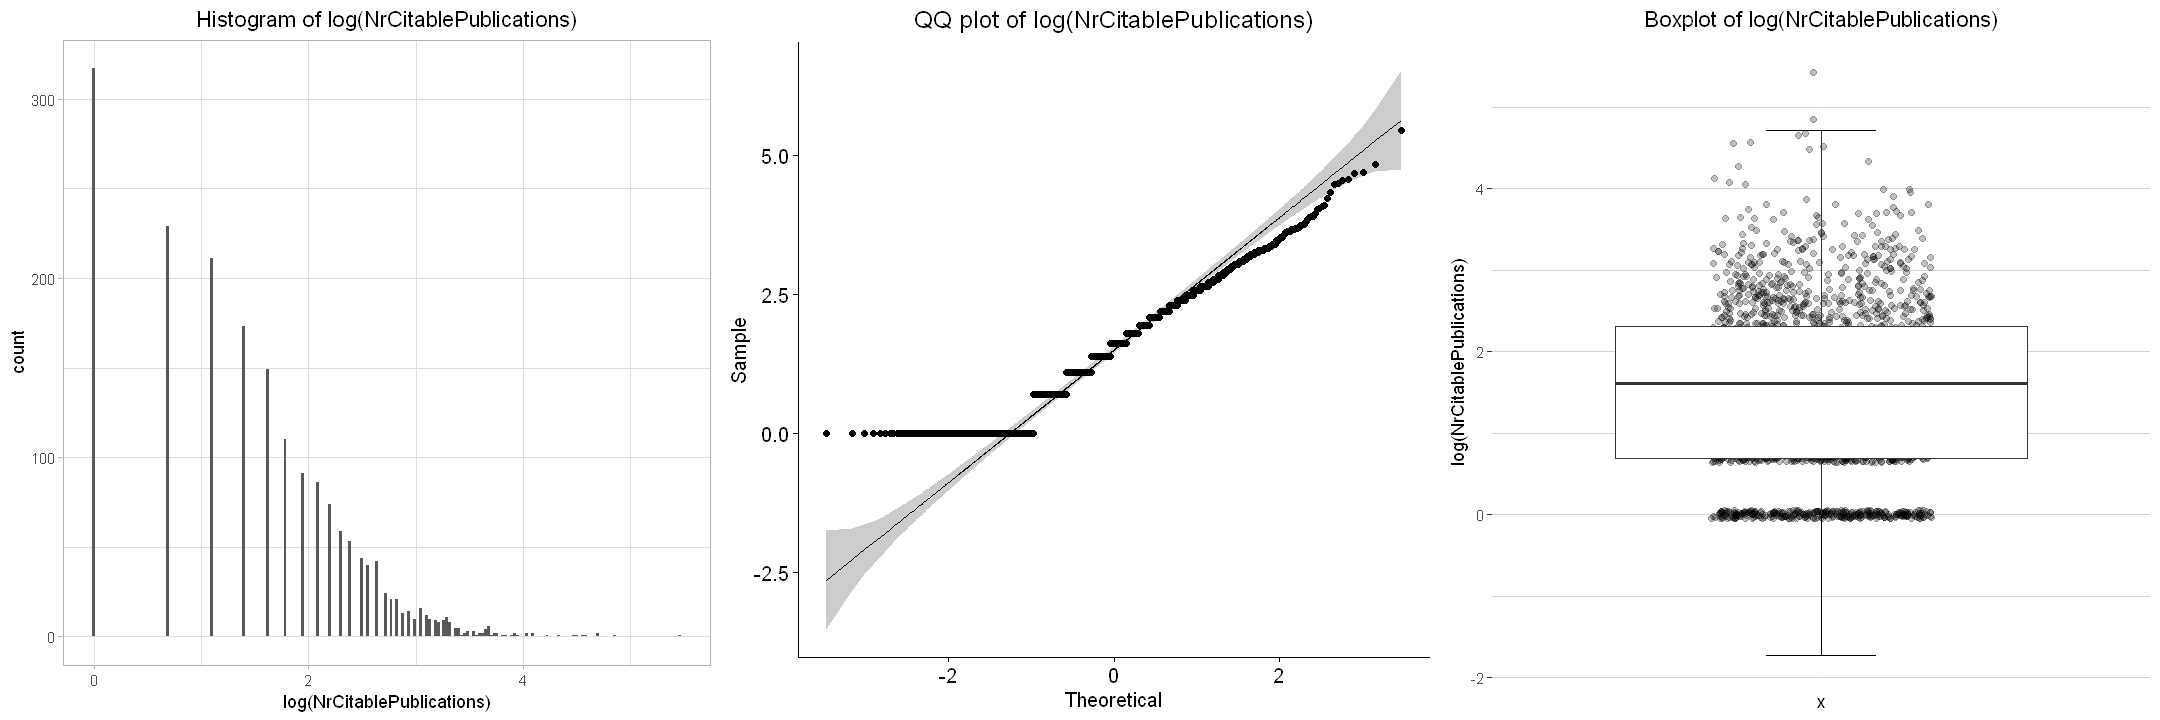

In [706]:
show_plots(data=data, column=data$NrCitablePublications, variable="NrCitablePublications", bins=200, log=TRUE)

Die Daten zur Gesamtanzahl der Publikationen sind stark schief verteilt. Es scheint, dass viele Projekte letztendlich nur sehr wenige Ergebnisse veröffentlichen. Zwei Datenpunkte liegen über dem oberen Whisker im Boxplot.

#### <a id='toc1_2_2_5_'></a>[Anzahl Publikationen pro Jahr (NrCitablePublicationsPerYear)](#toc0_)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1714  1.0000  1.9982  2.9914  3.6049 58.7500 


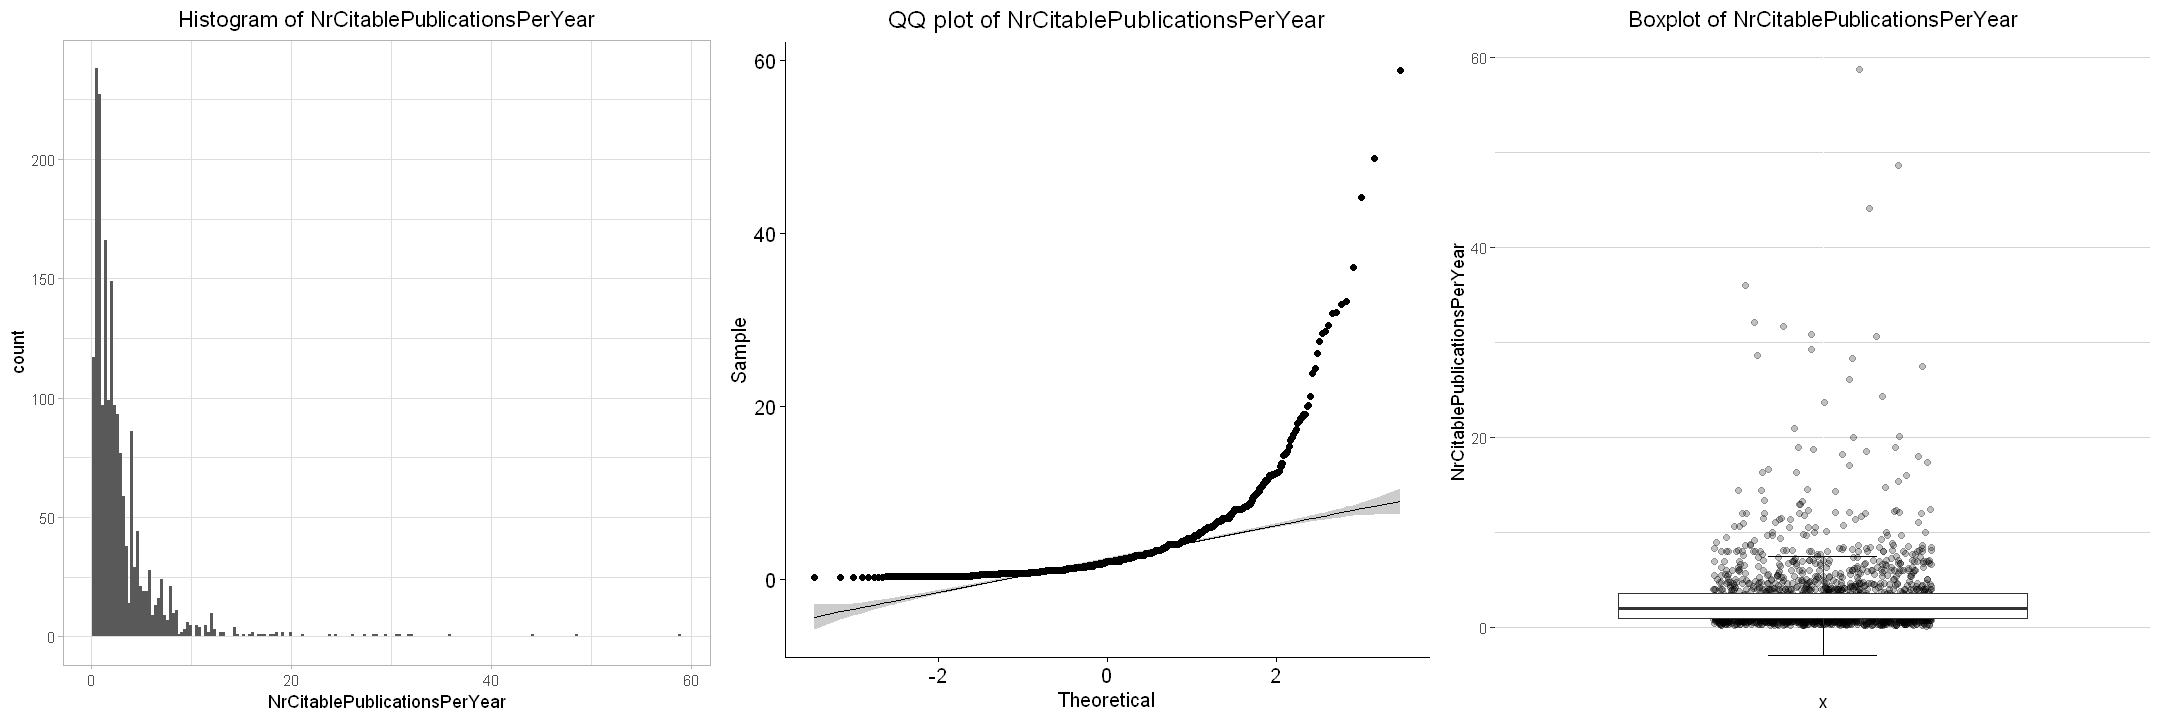

In [707]:
show_plots(data=data, column=data$NrCitablePublicationsPerYear, variable="NrCitablePublicationsPerYear", bins=200, log=FALSE)

Mit log-Transformation:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.7635  0.0000  0.6922  0.6227  1.2823  4.0733 


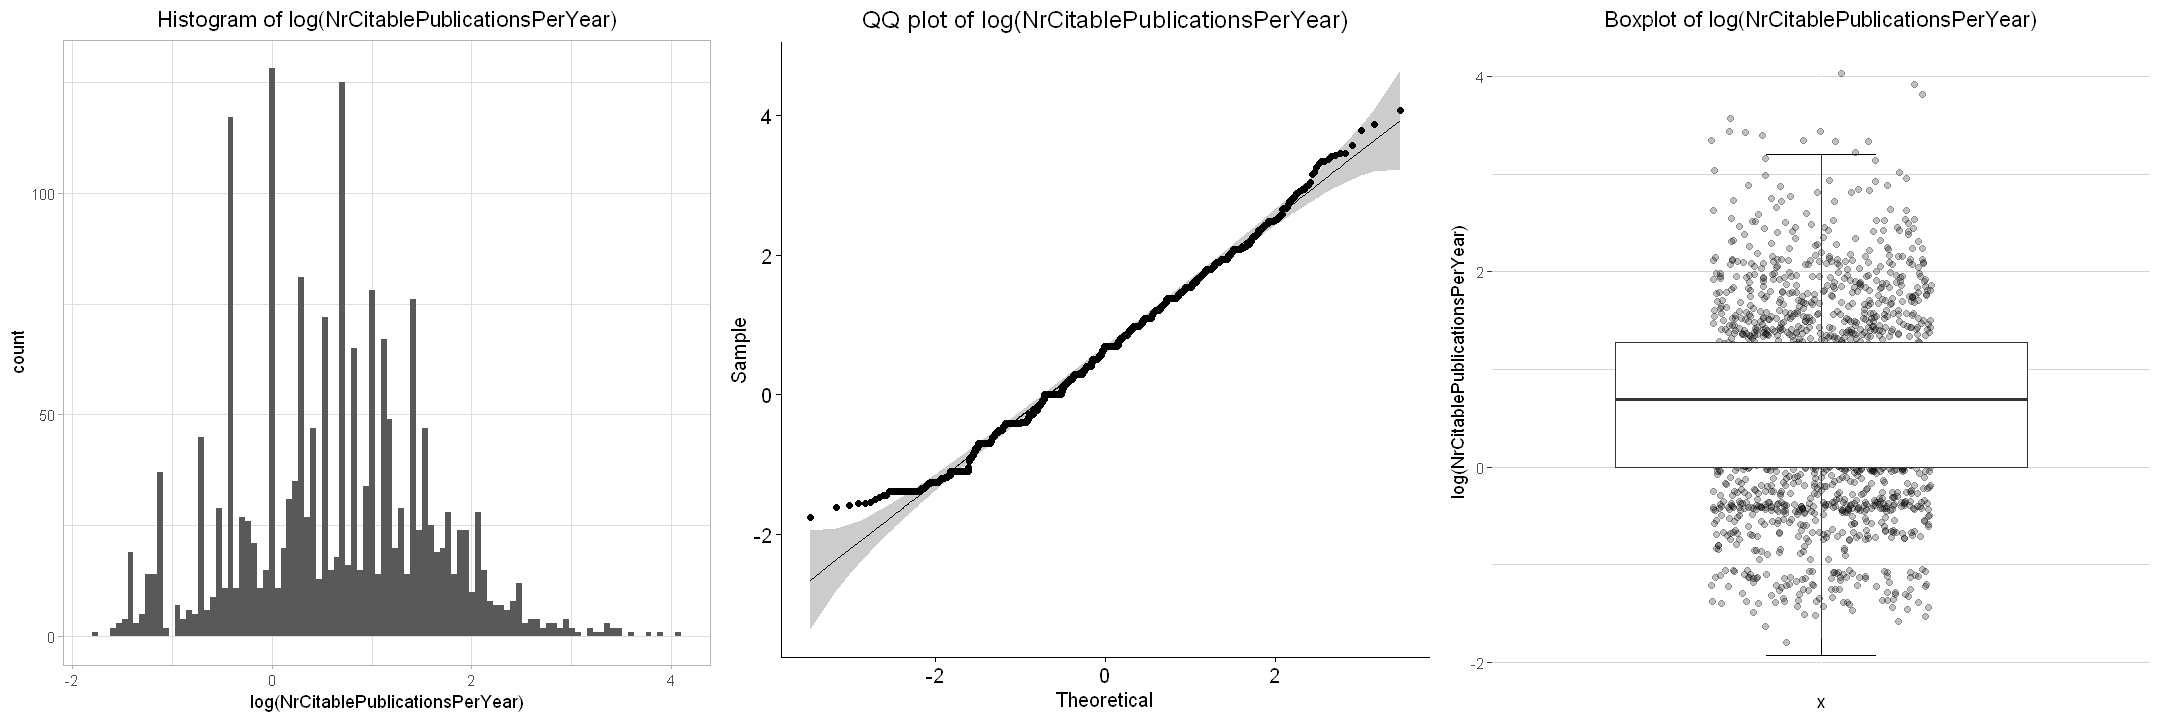

In [708]:
show_plots(data=data, column=data$NrCitablePublicationsPerYear, variable="NrCitablePublicationsPerYear", bins=100, log=TRUE)

Die log-transformierten Daten zur durchschnittlichen Anzahl von Publikationen pro Jahr weisen eine annähernd normale Verteilung auf. Es gibt jedoch einige Projekte, die einen sehr hohen Wert aufweisen und als Ausreisser betrachtet werden können.

#### <a id='toc1_2_2_6_'></a>[Totale Anzahl Zitierungen (NrCitationsTotal)](#toc0_)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    36.0   121.0   336.4   348.0 11713.0 


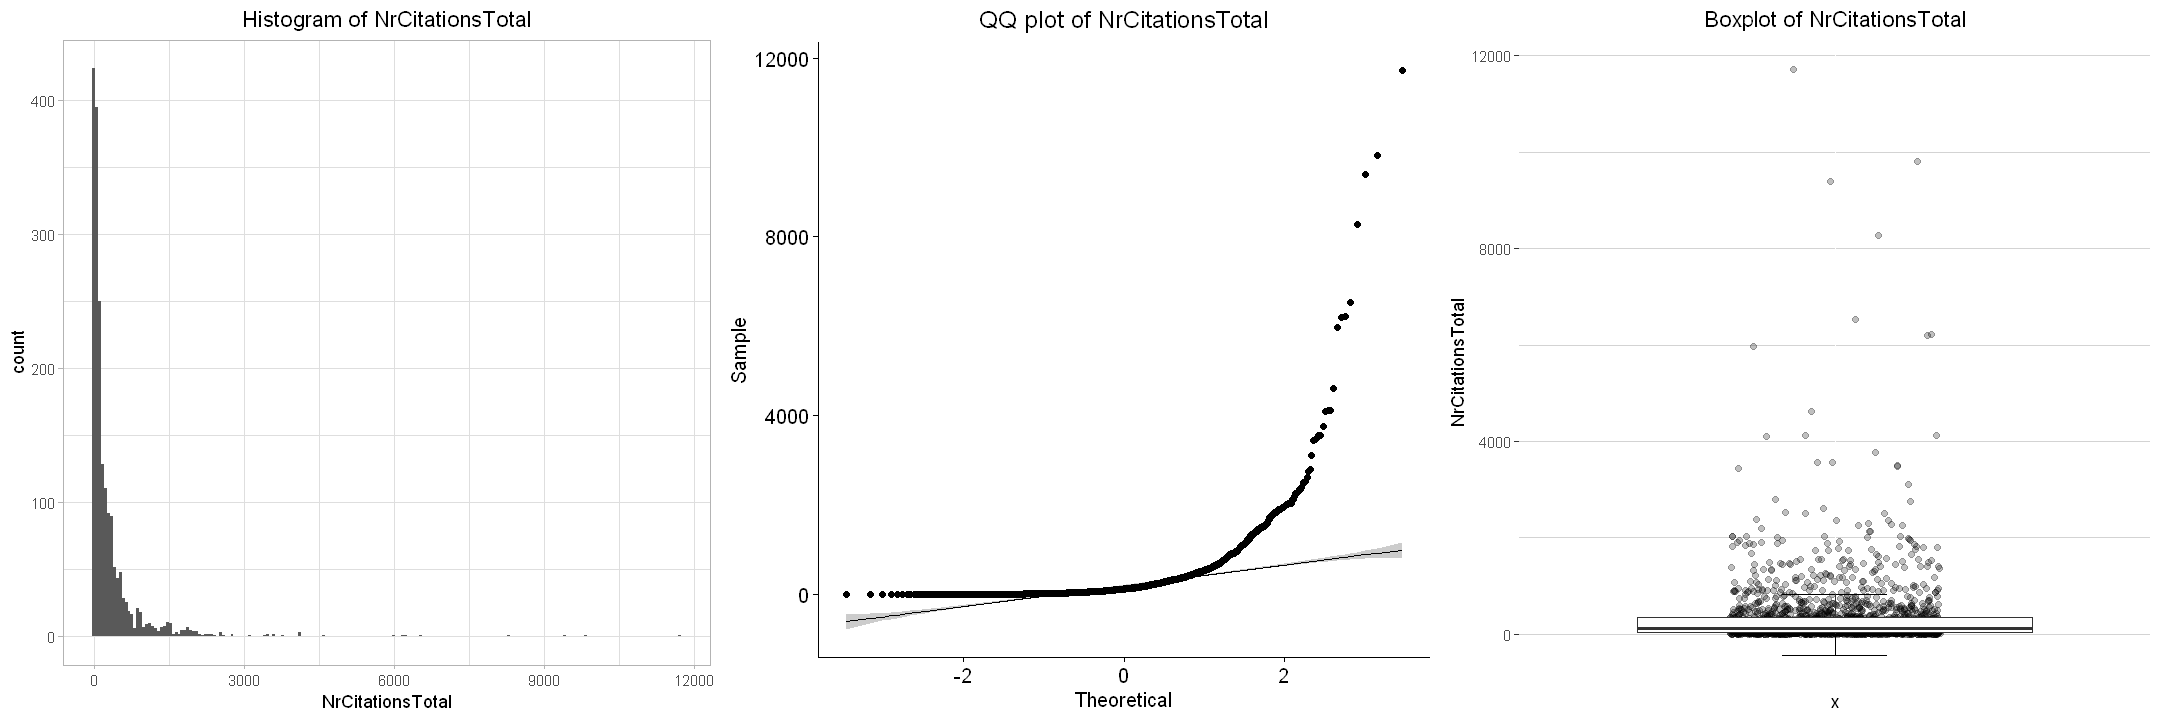

In [709]:
show_plots(data=data, column=data$NrCitationsTotal, variable="NrCitationsTotal", bins=200, log=FALSE)

Mit log-Transformation:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.584   4.796   4.649   5.852   9.368 


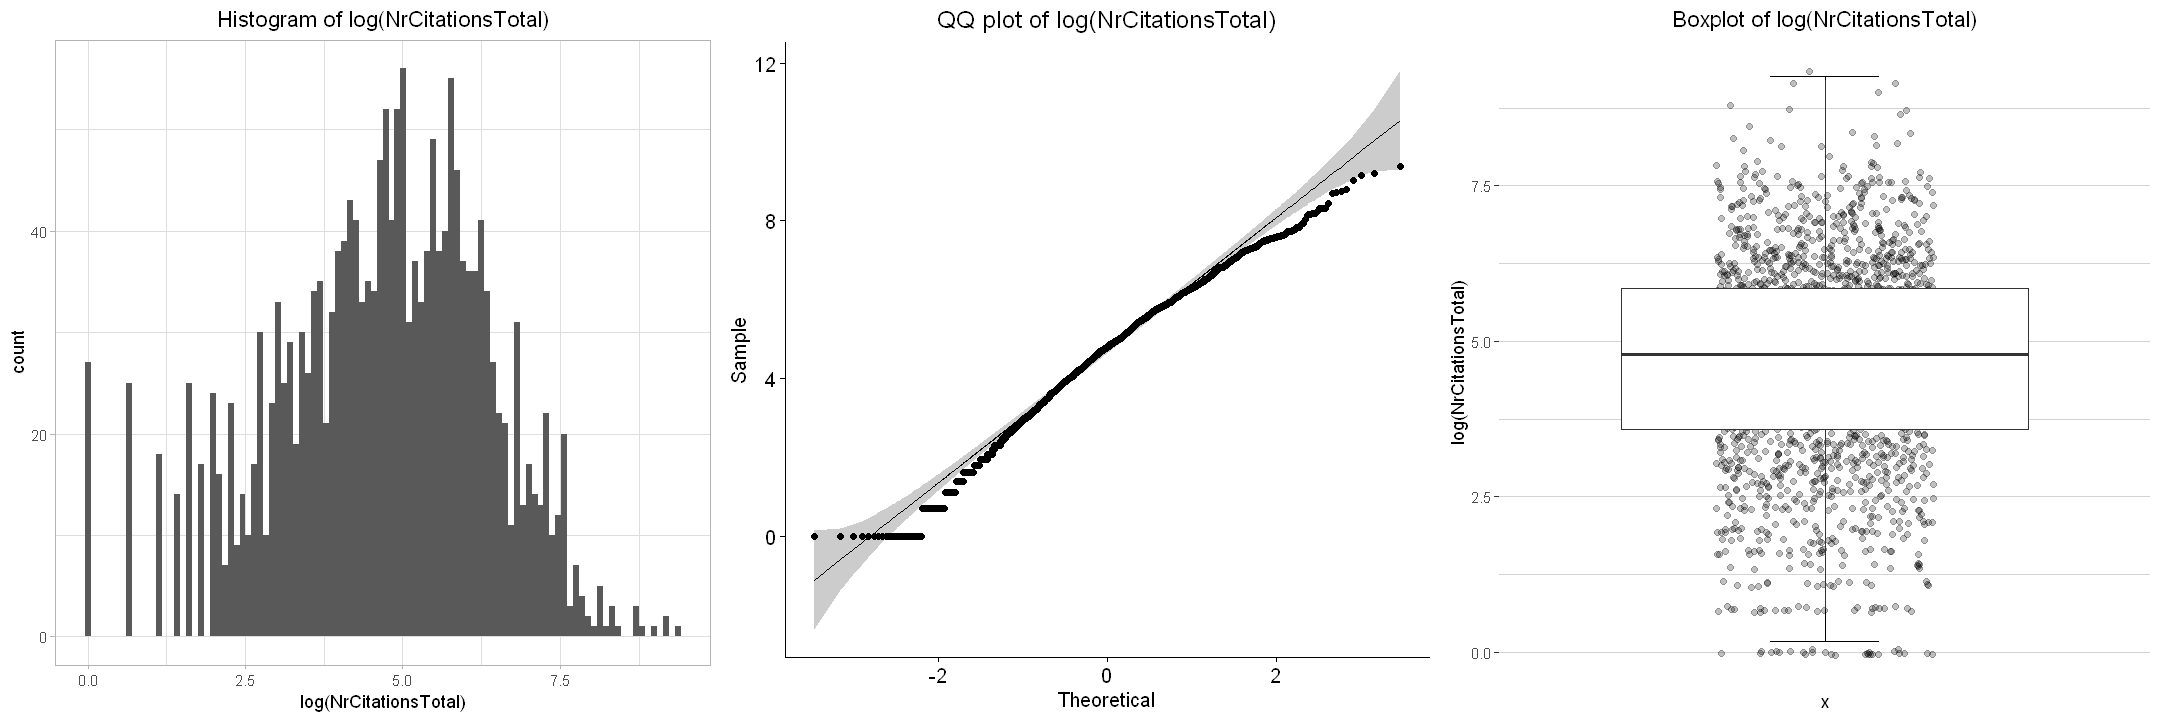

In [710]:
# Mit log-Transformation
show_plots(data=data, column=data$NrCitationsTotal, variable="NrCitationsTotal", bins=100, log=TRUE)

Die log-transformierten Daten zur Gesamtanzahl der Zitierungen eines Projekts weisen eine verbesserte Verteilung auf. Es gibt jedoch vor allem im unteren Bereich übermässig viele Projekte, bei denen nur sehr wenige Zitierungen insgesamt vorliegen.

#### <a id='toc1_2_2_7_'></a>[Anzahl Zitierungen pro Publikation (NrCitationsPerPublication)](#toc0_)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.3333  11.0000  23.5000  42.4710  48.9326 765.3333 


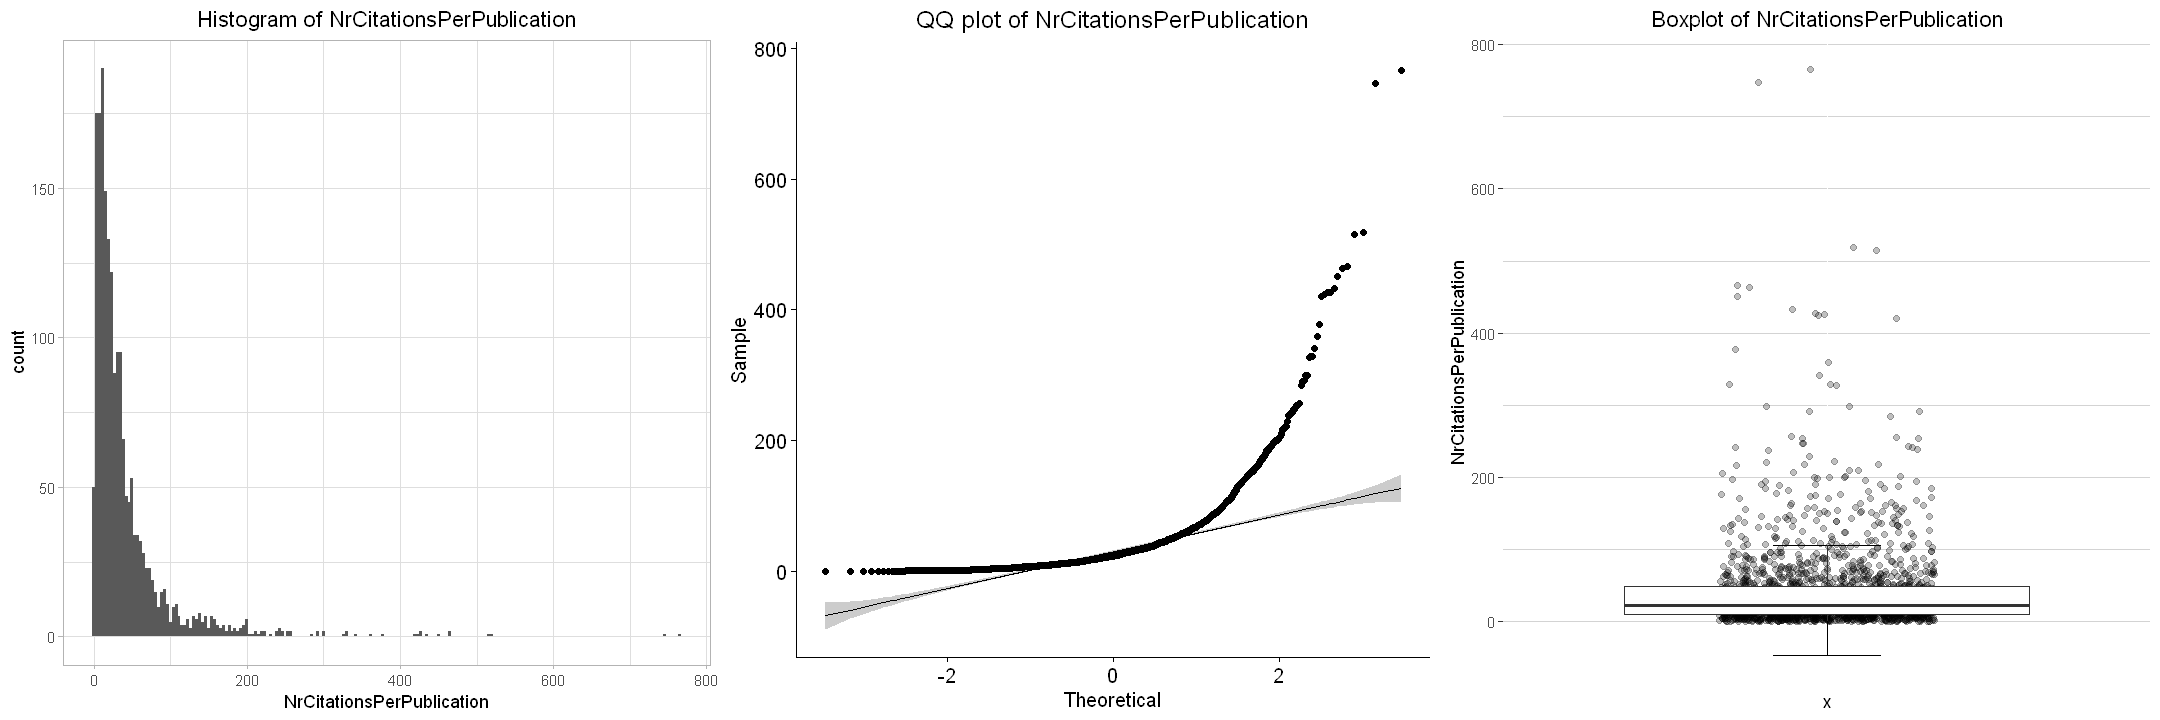

In [711]:
show_plots(data=data, column=data$NrCitationsPerPublication, variable="NrCitationsPerPublication", bins=200, log=FALSE)

Mit log-Transformation:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.099   2.398   3.157   3.114   3.890   6.640 


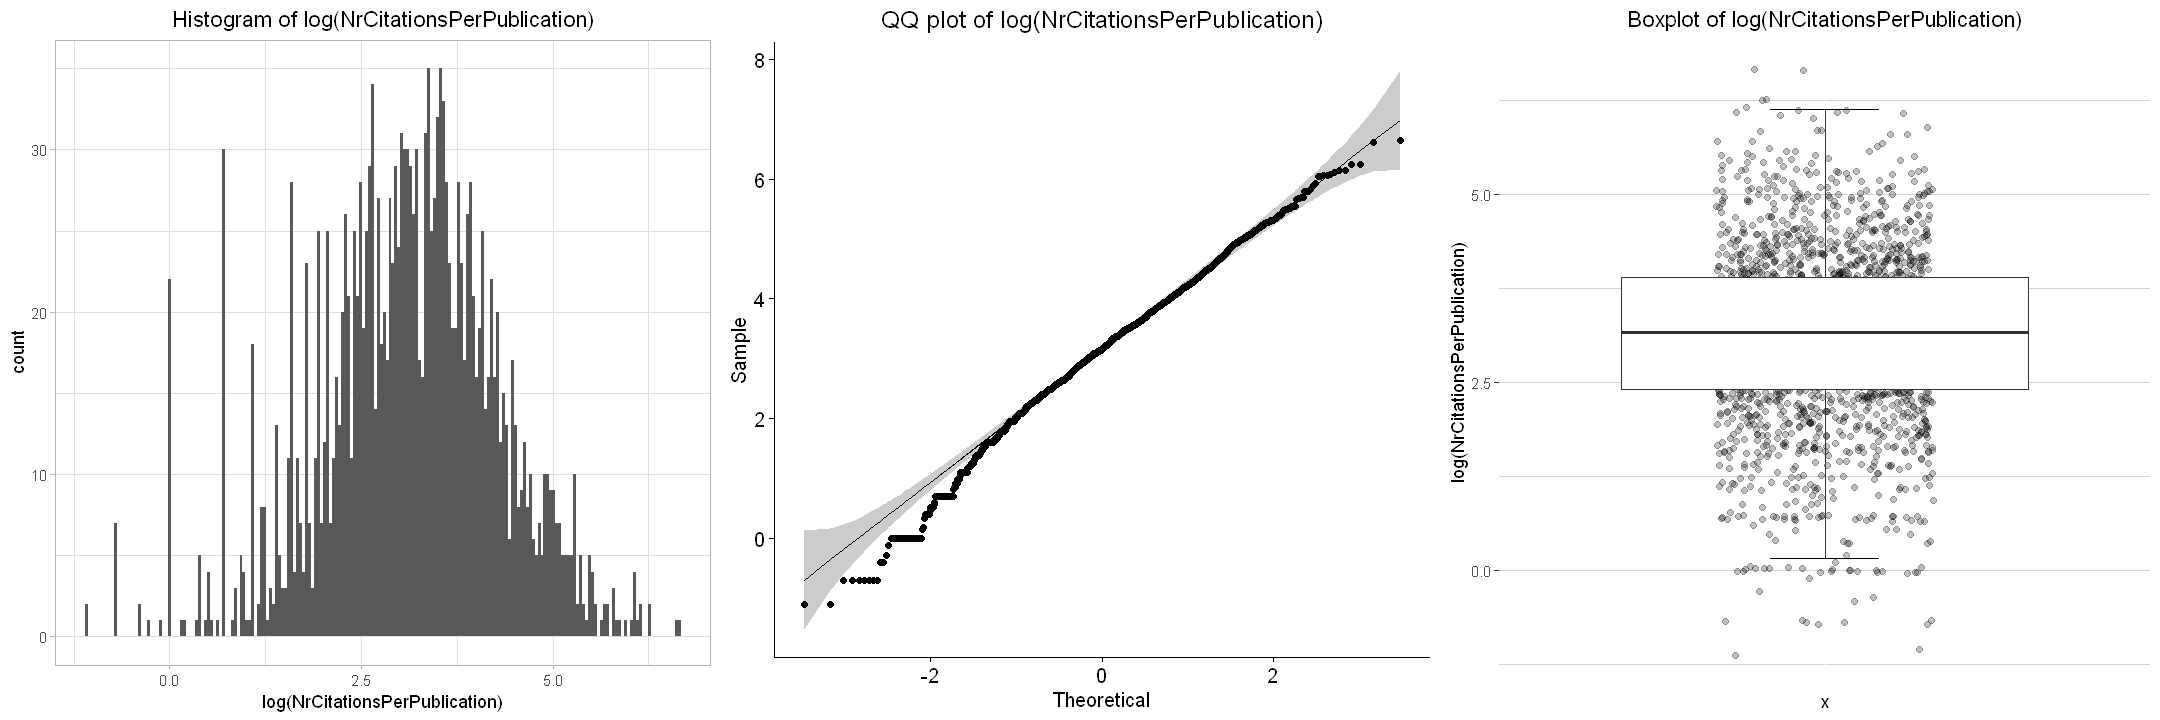

In [803]:
show_plots(data=data, column=data$NrCitationsPerPublication, variable="NrCitationsPerPublication", bins=200, log=TRUE)

Auch bei der durchschnittlichen Anzahl von Zitierungen pro Publikation zeigen die log-transformierten Daten eine deutlich verbesserte Verteilung. Es sind jedoch Abweichungen von der Normalverteilung zu beobachten, insbesondere im Bereich der niedrigen Werte.

#### <a id='toc1_2_2_8_'></a>[Genereller Umgang mit Ausreissern](#toc0_)

Die Ausreisser gemäss den Boxplots werden als echte und valide Datenpunkte betrachtet. Sie beruhen nicht auf Fehlern in den Daten und sind für die Zielgruppe der Analyse durchaus von Interesse.

#### <a id='toc1_2_2_9_'></a>[Förderungsinstrument](#toc0_)

In [849]:
options(repr.plot.width=12, repr.plot.height=7) # Grösse der Plots festlegen

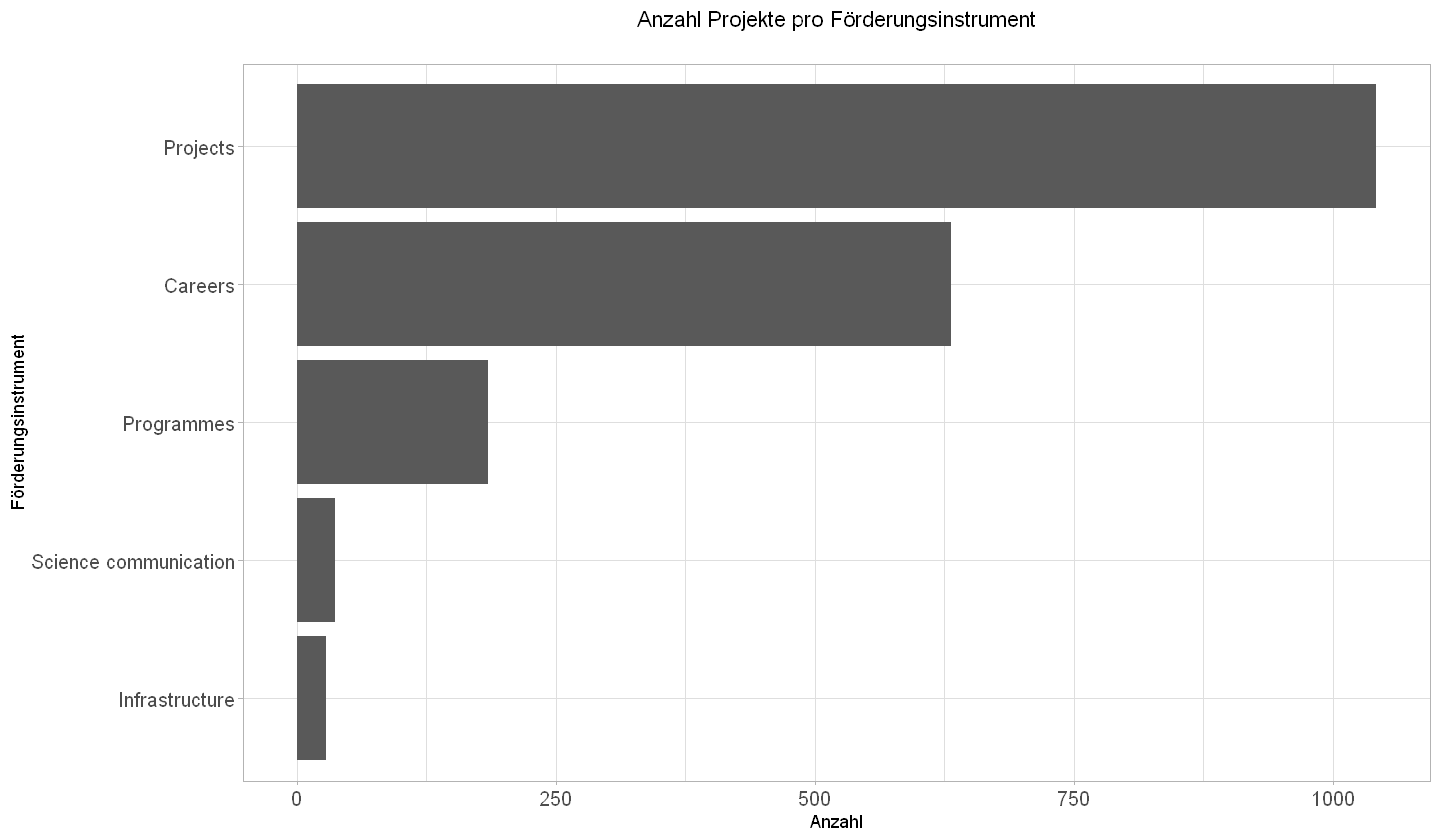

In [850]:
ggplot(data,
  aes(x=reorder(FundingInstrumentLevel1, FundingInstrumentLevel1, function(x) length(x)))) + 
  geom_bar() +
  coord_flip() +
  theme_light() +
  ggtitle("Anzahl Projekte pro Förderungsinstrument\n") +
  theme(plot.title=element_text(hjust=0.5)) +
  labs(x="Förderungsinstrument", y="Anzahl") +
  theme(axis.text=element_text(size=12))

#### <a id='toc1_2_2_10_'></a>[Forschungsgebiete](#toc0_)

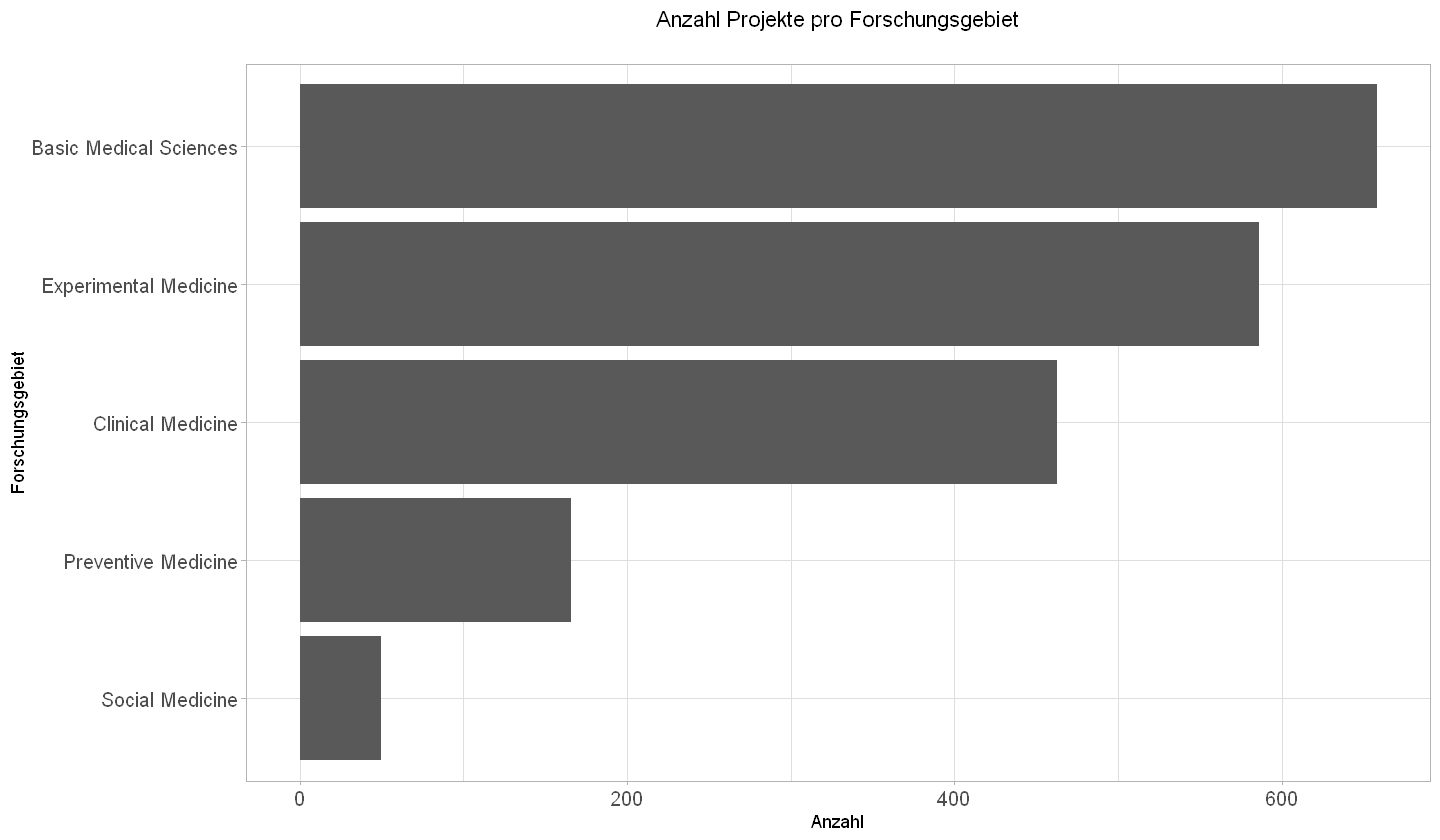

In [806]:
ggplot(data,
  aes(x=reorder(MainDiscipline_Level2, MainDiscipline_Level2, function(x) length(x)))) + 
  geom_bar() +
  coord_flip() +
  theme_light() +
  ggtitle("Anzahl Projekte pro Forschungsgebiet\n") +
  theme(plot.title=element_text(hjust=0.5)) +
  labs(x="Forschungsgebiet", y="Anzahl") +
  theme(axis.text=element_text(size=12))

### <a id='toc1_2_3_'></a>["Summary" der log-transformierten Daten](#toc0_)
Wir werden im weiteren Verlauf für einige Variabeln in der Regel mit den log-transformierten Daten arbeiten. Daher folgt hier erneut eine entsprechende "Summary".

In [808]:
# Numerische Daten und log-Transformation der relevanten Variabeln
data_numeric <- data %>% dplyr::select(
                            GrantDurationYears,
                            AmountGrantedAllSets,
                            AmountPerYear,
                            NrCitablePublications,
                            NrCitablePublicationsPerYear,
                            NrCitationsTotal,
                            NrCitationsPerPublication
                            ) %>% 
                        mutate(
                            logAmountGrantedAllSets=log(AmountGrantedAllSets),
                            logAmountPerYear=log(AmountPerYear),
                            logNrCitablePublications=log(NrCitablePublications),
                            logNrCitablePublicationsPerYear=log(NrCitablePublicationsPerYear),
                            logNrCitationsTotal=log(NrCitationsTotal),
                            logNrCitationsPerPublication=log(NrCitationsPerPublication),
                        ) %>% 
                        dplyr::select(
                            GrantDurationYears,
                            logAmountGrantedAllSets,
                            logAmountPerYear,
                            logNrCitablePublications,
                            logNrCitablePublicationsPerYear,
                            logNrCitationsTotal,
                            logNrCitationsPerPublication
                        )

In [809]:
# Summary der metrischen, log-transformierten Variabeln
summary(data_numeric)

 GrantDurationYears logAmountGrantedAllSets logAmountPerYear logNrCitablePublications logNrCitablePublicationsPerYear
 Min.   :0.08219    Min.   : 7.313          Min.   : 8.386   Min.   :0.0000           Min.   :-1.7635                
 1st Qu.:1.78904    1st Qu.:11.786          1st Qu.:11.192   1st Qu.:0.6931           1st Qu.: 0.0000                
 Median :3.00000    Median :12.867          Median :11.683   Median :1.6094           Median : 0.6922                
 Mean   :2.83549    Mean   :12.587          Mean   :11.675   Mean   :1.5347           Mean   : 0.6227                
 3rd Qu.:3.74795    3rd Qu.:13.302          3rd Qu.:12.073   3rd Qu.:2.3026           3rd Qu.: 1.2823                
 Max.   :6.91507    Max.   :16.170          Max.   :14.783   Max.   :5.4596           Max.   : 4.0733                
 logNrCitationsTotal logNrCitationsPerPublication
 Min.   :0.000       Min.   :-1.099              
 1st Qu.:3.584       1st Qu.: 2.398              
 Median :4.796       Med

### <a id='toc1_2_4_'></a>[Korrelationsmatrix](#toc0_)

Auch für die Korrelationsmatrix verwenden wir, wenn relevant, die log-transformierten Daten.

In [810]:
cor(data_numeric)

,GrantDurationYears,logAmountGrantedAllSets,logAmountPerYear,logNrCitablePublications,logNrCitablePublicationsPerYear,logNrCitationsTotal,logNrCitationsPerPublication
GrantDurationYears,1.00000000,0.78097080,0.4114829,0.3871459,-0.16396099,0.2092149,-0.03049333
logAmountGrantedAllSets,0.78097080,1.00000000,0.8584575,0.4688306,-0.01483358,0.3482660,0.09952490
logAmountPerYear,0.41148294,0.85845747,1.0000000,0.4068491,0.16927150,0.3469307,0.15064380
logNrCitablePublications,0.38714592,0.46883065,0.4068491,1.0000000,0.82173324,0.7312547,0.19562750
logNrCitablePublicationsPerYear,-0.16396099,-0.01483358,0.1692715,0.8217332,1.00000000,0.6283005,0.20015322
logNrCitationsTotal,0.20921489,0.34826596,0.3469307,0.7312547,0.62830048,1.0000000,0.81197856
logNrCitationsPerPublication,-0.03049333,0.09952490,0.1506438,0.1956275,0.20015322,0.8119786,1.00000000


Einige hochkorrelierte Zusammenhänge sind wenig überraschend und werden nicht weiter verfolgt. Dazu gehören die Korrelationen zwischen den Gesamtwerten und den entsprechenden Durchschnittswerten pro Jahr (logAmountGrantedAllSets und logAmountPerYear, logNrCitablePublications und logNrCitablePublicationsPerYear, logNrCitationsTotal und logNrCitationsPerPublication).

Auch die vergleichsweise hohe Korrelation zwischen der Projektdauer und dem Gesamtförderungsbetrag (GrantDurationYears und logAmountGrantedAllSets) ist wenig überraschend, da längere Projekte erwartungsgemäss mehr Förderung benötigen.

Es gibt keine besonders starke Korrelation zwischen dem Gesamtförderungsbetrag und der Gesamtzahl der Zitierungen (logAmountGrantedAllSets und logNrCitationsTotal). Ebenso besteht keine hohe Korrelation zwischen dem jährlichen Förderungsbetrag und der durchschnittlichen Anzahl der Zitierungen pro Publikation (logAmountPerYear und logNrCitationsPerPublication).

Die Korrelation zwischen der durchschnittlichen Anzahl von Publikationen pro Jahr und der Gesamtzahl der Zitierungen ist nicht völlig überraschend, setzt jedoch voraus, dass die Publikationen tatsächlich zitiert werden. Wir werden diesen Zusammenhang im weiteren Verlauf der Semesterarbeit noch näher betrachten.

### <a id='toc1_2_5_'></a>[Pairs](#toc0_)

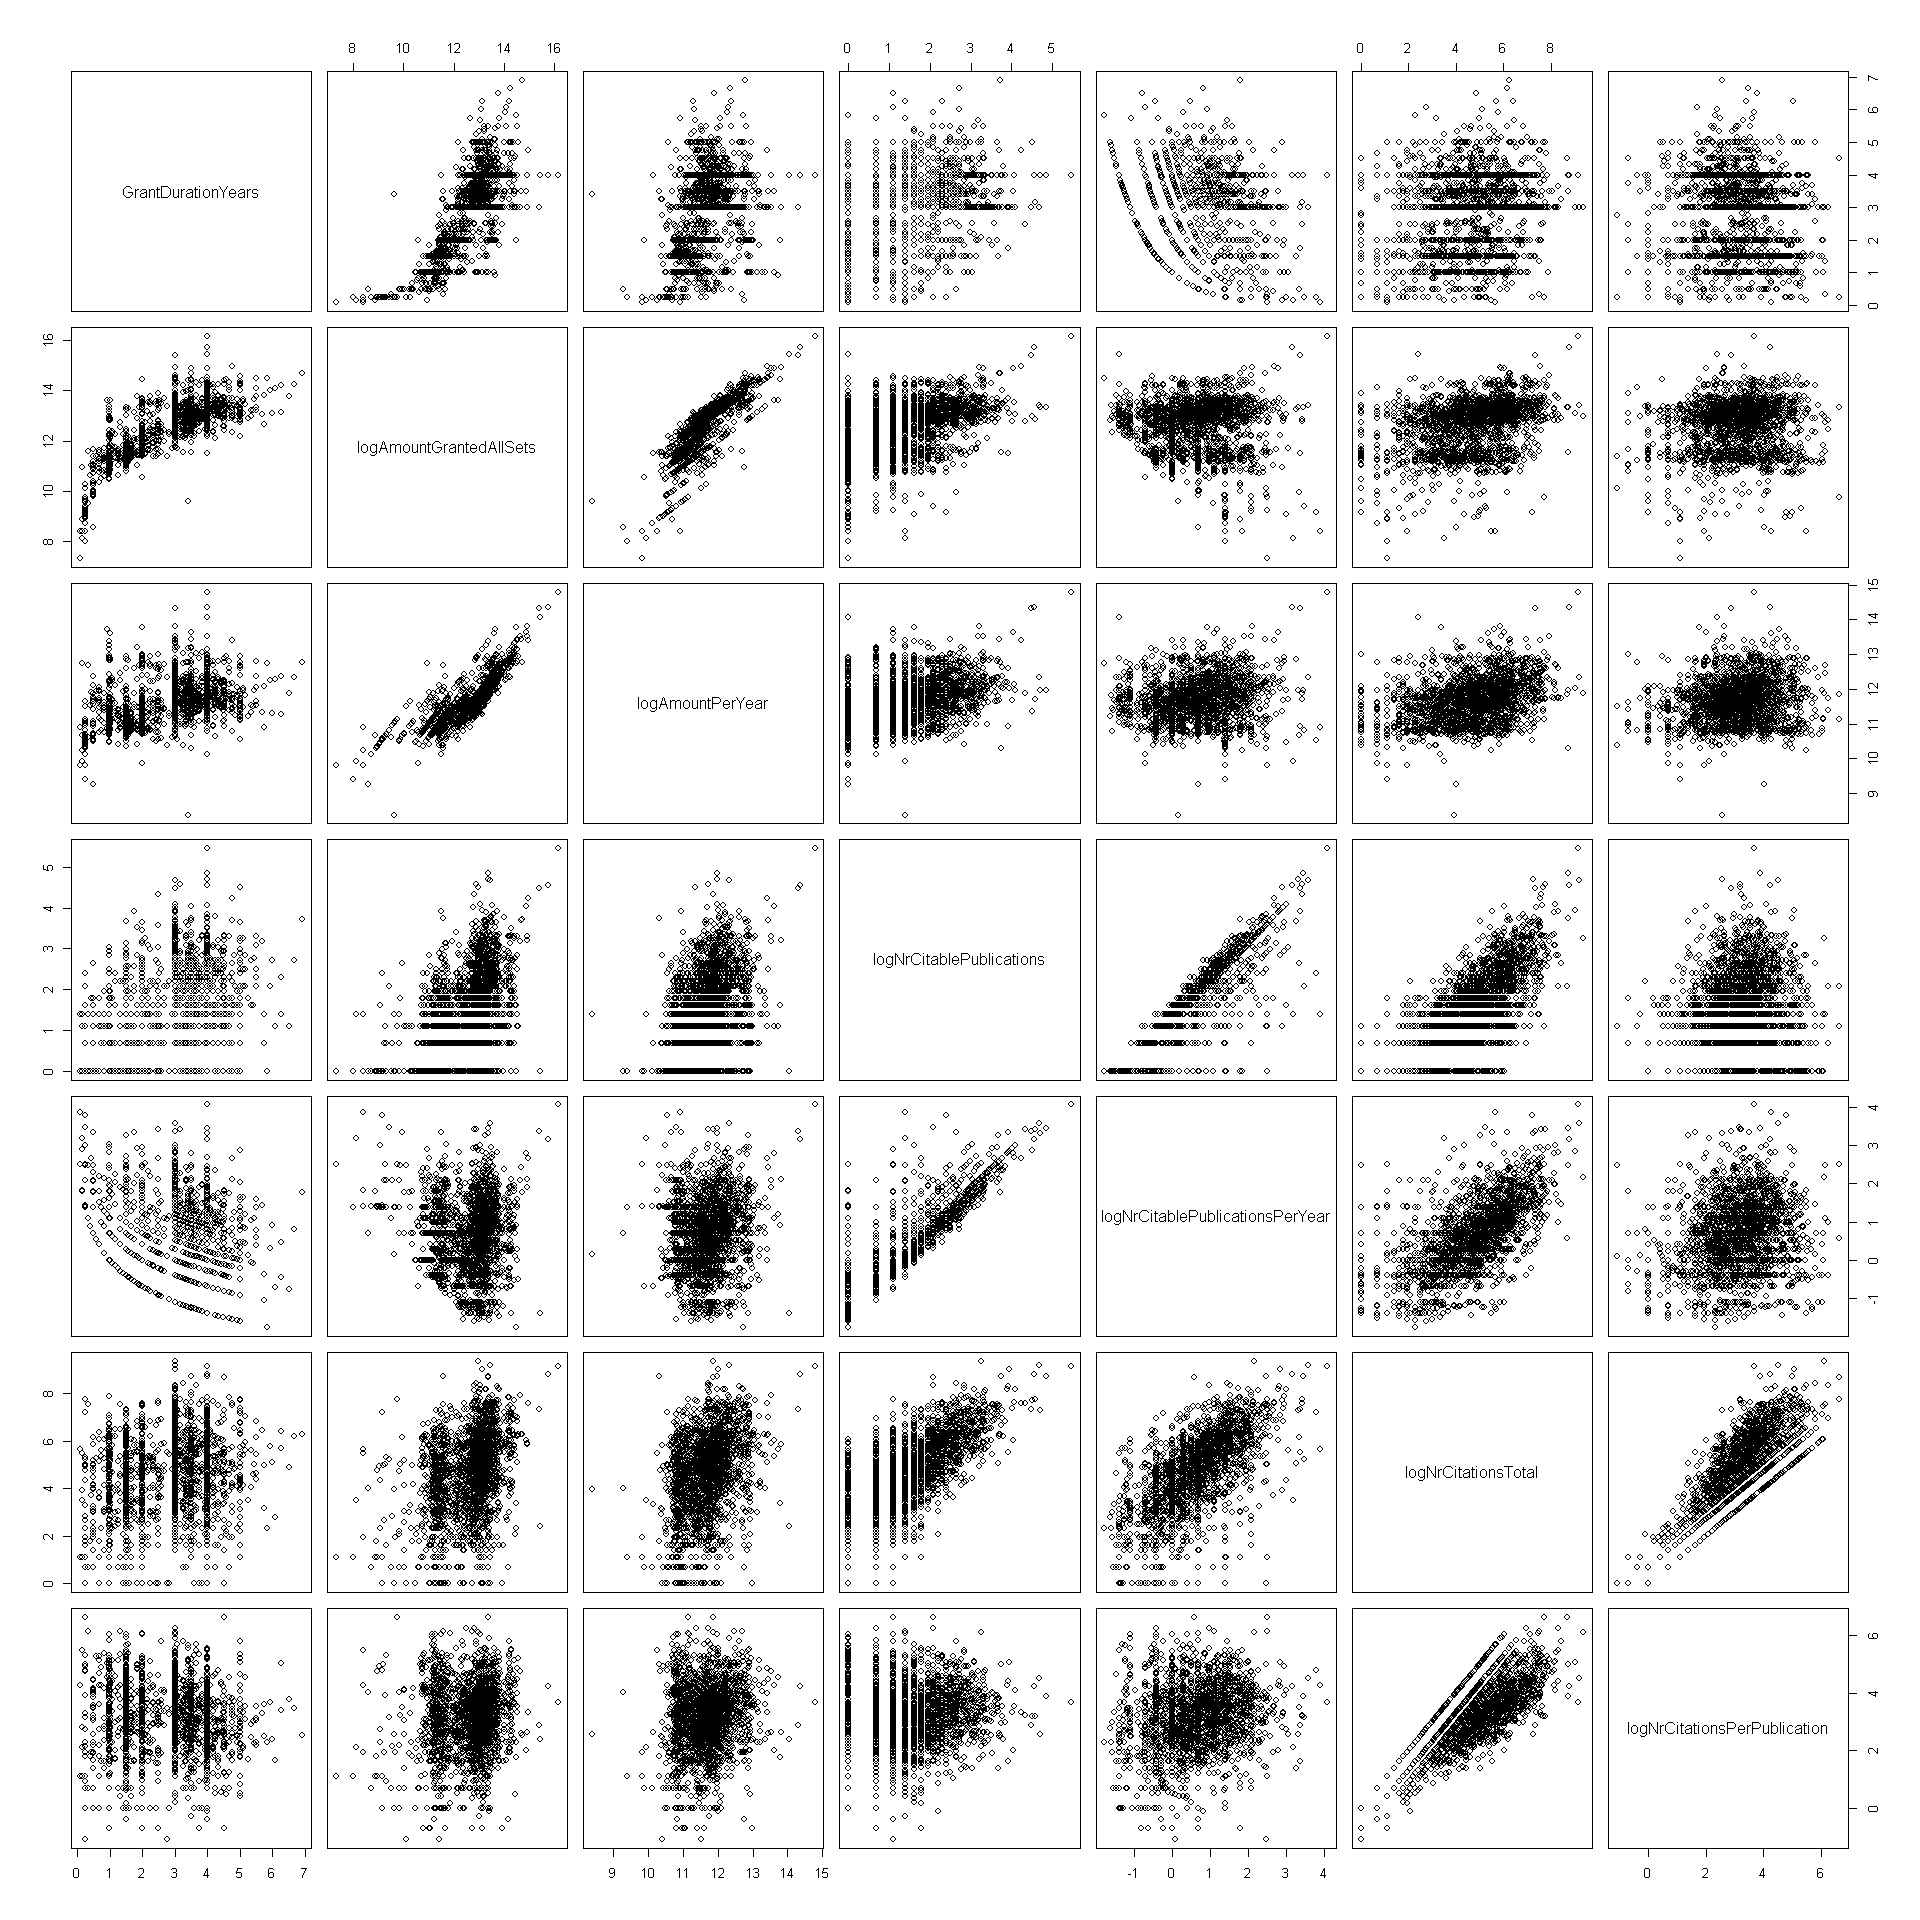

In [811]:
options(repr.plot.width=16, repr.plot.height=16)
pairs(data_numeric, cex.labels = 1.2)

Es sind keine offensichtlich linearen Zusammenhänge zwischen den Förderungsbeträgen (gesamt und pro Jahr) und der Gesamtanzahl der Zitierungen bzw. der Anzahl der Zitierungen pro Publikation erkennbar.

Die deutlichste Linearität besteht zwischen der Anzahl der Publikationen pro Jahr (logNrCitablePublicationsPerYear) und der Gesamtanzahl der Zitierungen (logNrCitationsTotal). Basierend auf dieser Erkenntnis soll im nächsten Kapitel überprüft werden, ob ein entsprechendes Modell generiert werden kann.

## <a id='toc1_3_'></a>[Multiple lineare Regression](#toc0_)

### <a id='toc1_3_1_'></a>[Theoretische Fundierung](#toc0_)
Wie im vorherigen Kapitel erwähnt, werden wir in diesem Kapitel prüfen, ob wir eine multiple lineare Regression für die Gesamtanzahl der Zitierungen erstellen können.

Eine Voraussetzung für die lineare Regression besteht darin, dass der Zusammenhang zwischen der abhängigen und der unabhängigen Variable linear ist. Daher werden wir erneut das Streudiagramm der Publikationen pro Jahr und der Gesamtanzahl der Zitierungen betrachten und die Punkte entsprechend des Förderungsinstruments einfärben.

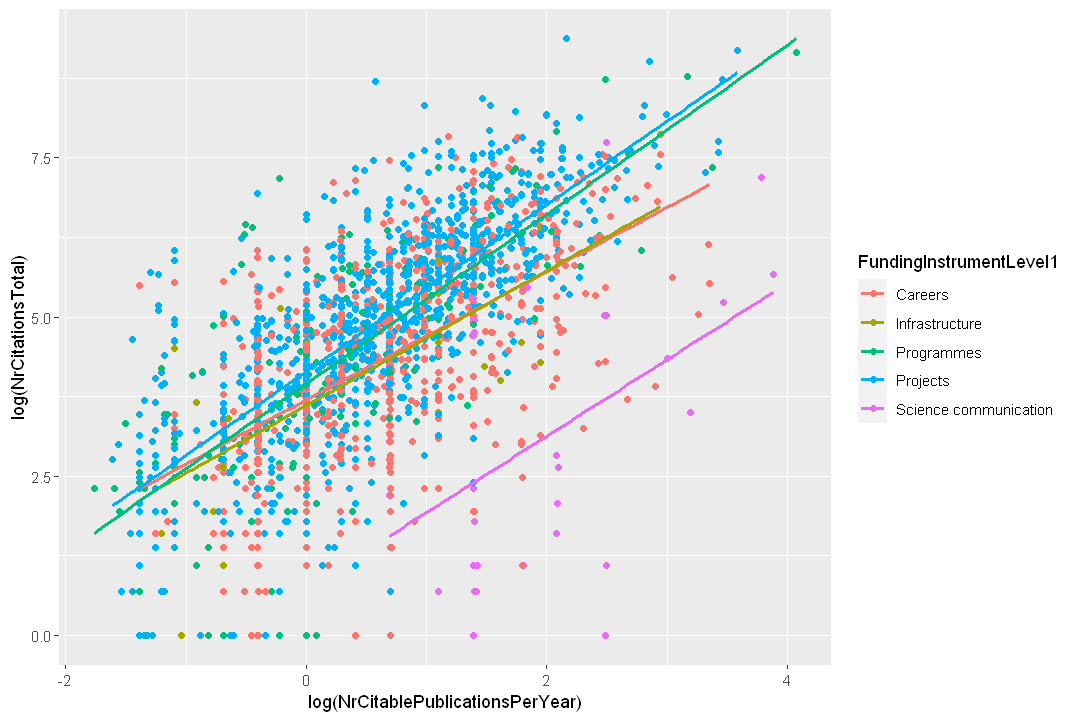

In [815]:
options(repr.plot.width=9, repr.plot.height=6) # Grösse des Plots festlegen
# Streudiagramm
ggplot(data, aes(x=log(NrCitablePublicationsPerYear), y=log(NrCitationsTotal), color=FundingInstrumentLevel1)) + 
  geom_point() +
  geom_smooth(method=lm, formula=y ~ x, se=FALSE)

Die grünen Punkte der "Programmes" zeigen eine geringere Streuung um die Regressionsgerade. Für die multiple lineare Regression beschränken wir uns daher auf die 185 Projekte, die dem Förderungsinstrument "Programmes" zugeordnet sind. Diese Projekte sind inhaltlich besser vergleichbar, da bei der Förderung bestimmte thematische oder konzeptionell-organisatorische Rahmenbedingungen vorgegeben sind. Wir erstellen erneut einen Pair-Plot nur für die "Programmes" und sehen, dass die zuvor beobachtete Linearität zwischen der Gesamtanzahl der Zitierungen (logNrCitationsTotal) und der durchschnittlichen Anzahl der Publikationen pro Jahr (logNrCitablePublicationsPerYear) deutlich ausgeprägter ist.

In [816]:
# Nach Förderungsinstrument "Programmes" filtern
programmes <- filter(data, FundingInstrumentLevel1 == "Programmes")
dim(programmes)

[1] 185   9

In [751]:
# Numerische Daten und log-Transformation der relevanten Variabeln
data_numeric.2 <- programmes %>% dplyr::select(
                            GrantDurationYears,
                            AmountGrantedAllSets,
                            AmountPerYear,
                            NrCitablePublications,
                            NrCitablePublicationsPerYear,
                            NrCitationsTotal,
                            NrCitationsPerPublication
                            ) %>% 
                        mutate(
                            logAmountGrantedAllSets=log(AmountGrantedAllSets),
                            logAmountPerYear=log(AmountPerYear),
                            logNrCitablePublications=log(NrCitablePublications),
                            logNrCitablePublicationsPerYear=log(NrCitablePublicationsPerYear),
                            logNrCitationsTotal=log(NrCitationsTotal),
                            logNrCitationsPerPublication=log(NrCitationsPerPublication),
                        ) %>% 
                        dplyr::select(
                            GrantDurationYears,
                            logAmountGrantedAllSets,
                            logAmountPerYear,
                            logNrCitablePublications,
                            logNrCitablePublicationsPerYear,
                            logNrCitationsTotal,
                            logNrCitationsPerPublication
                        )

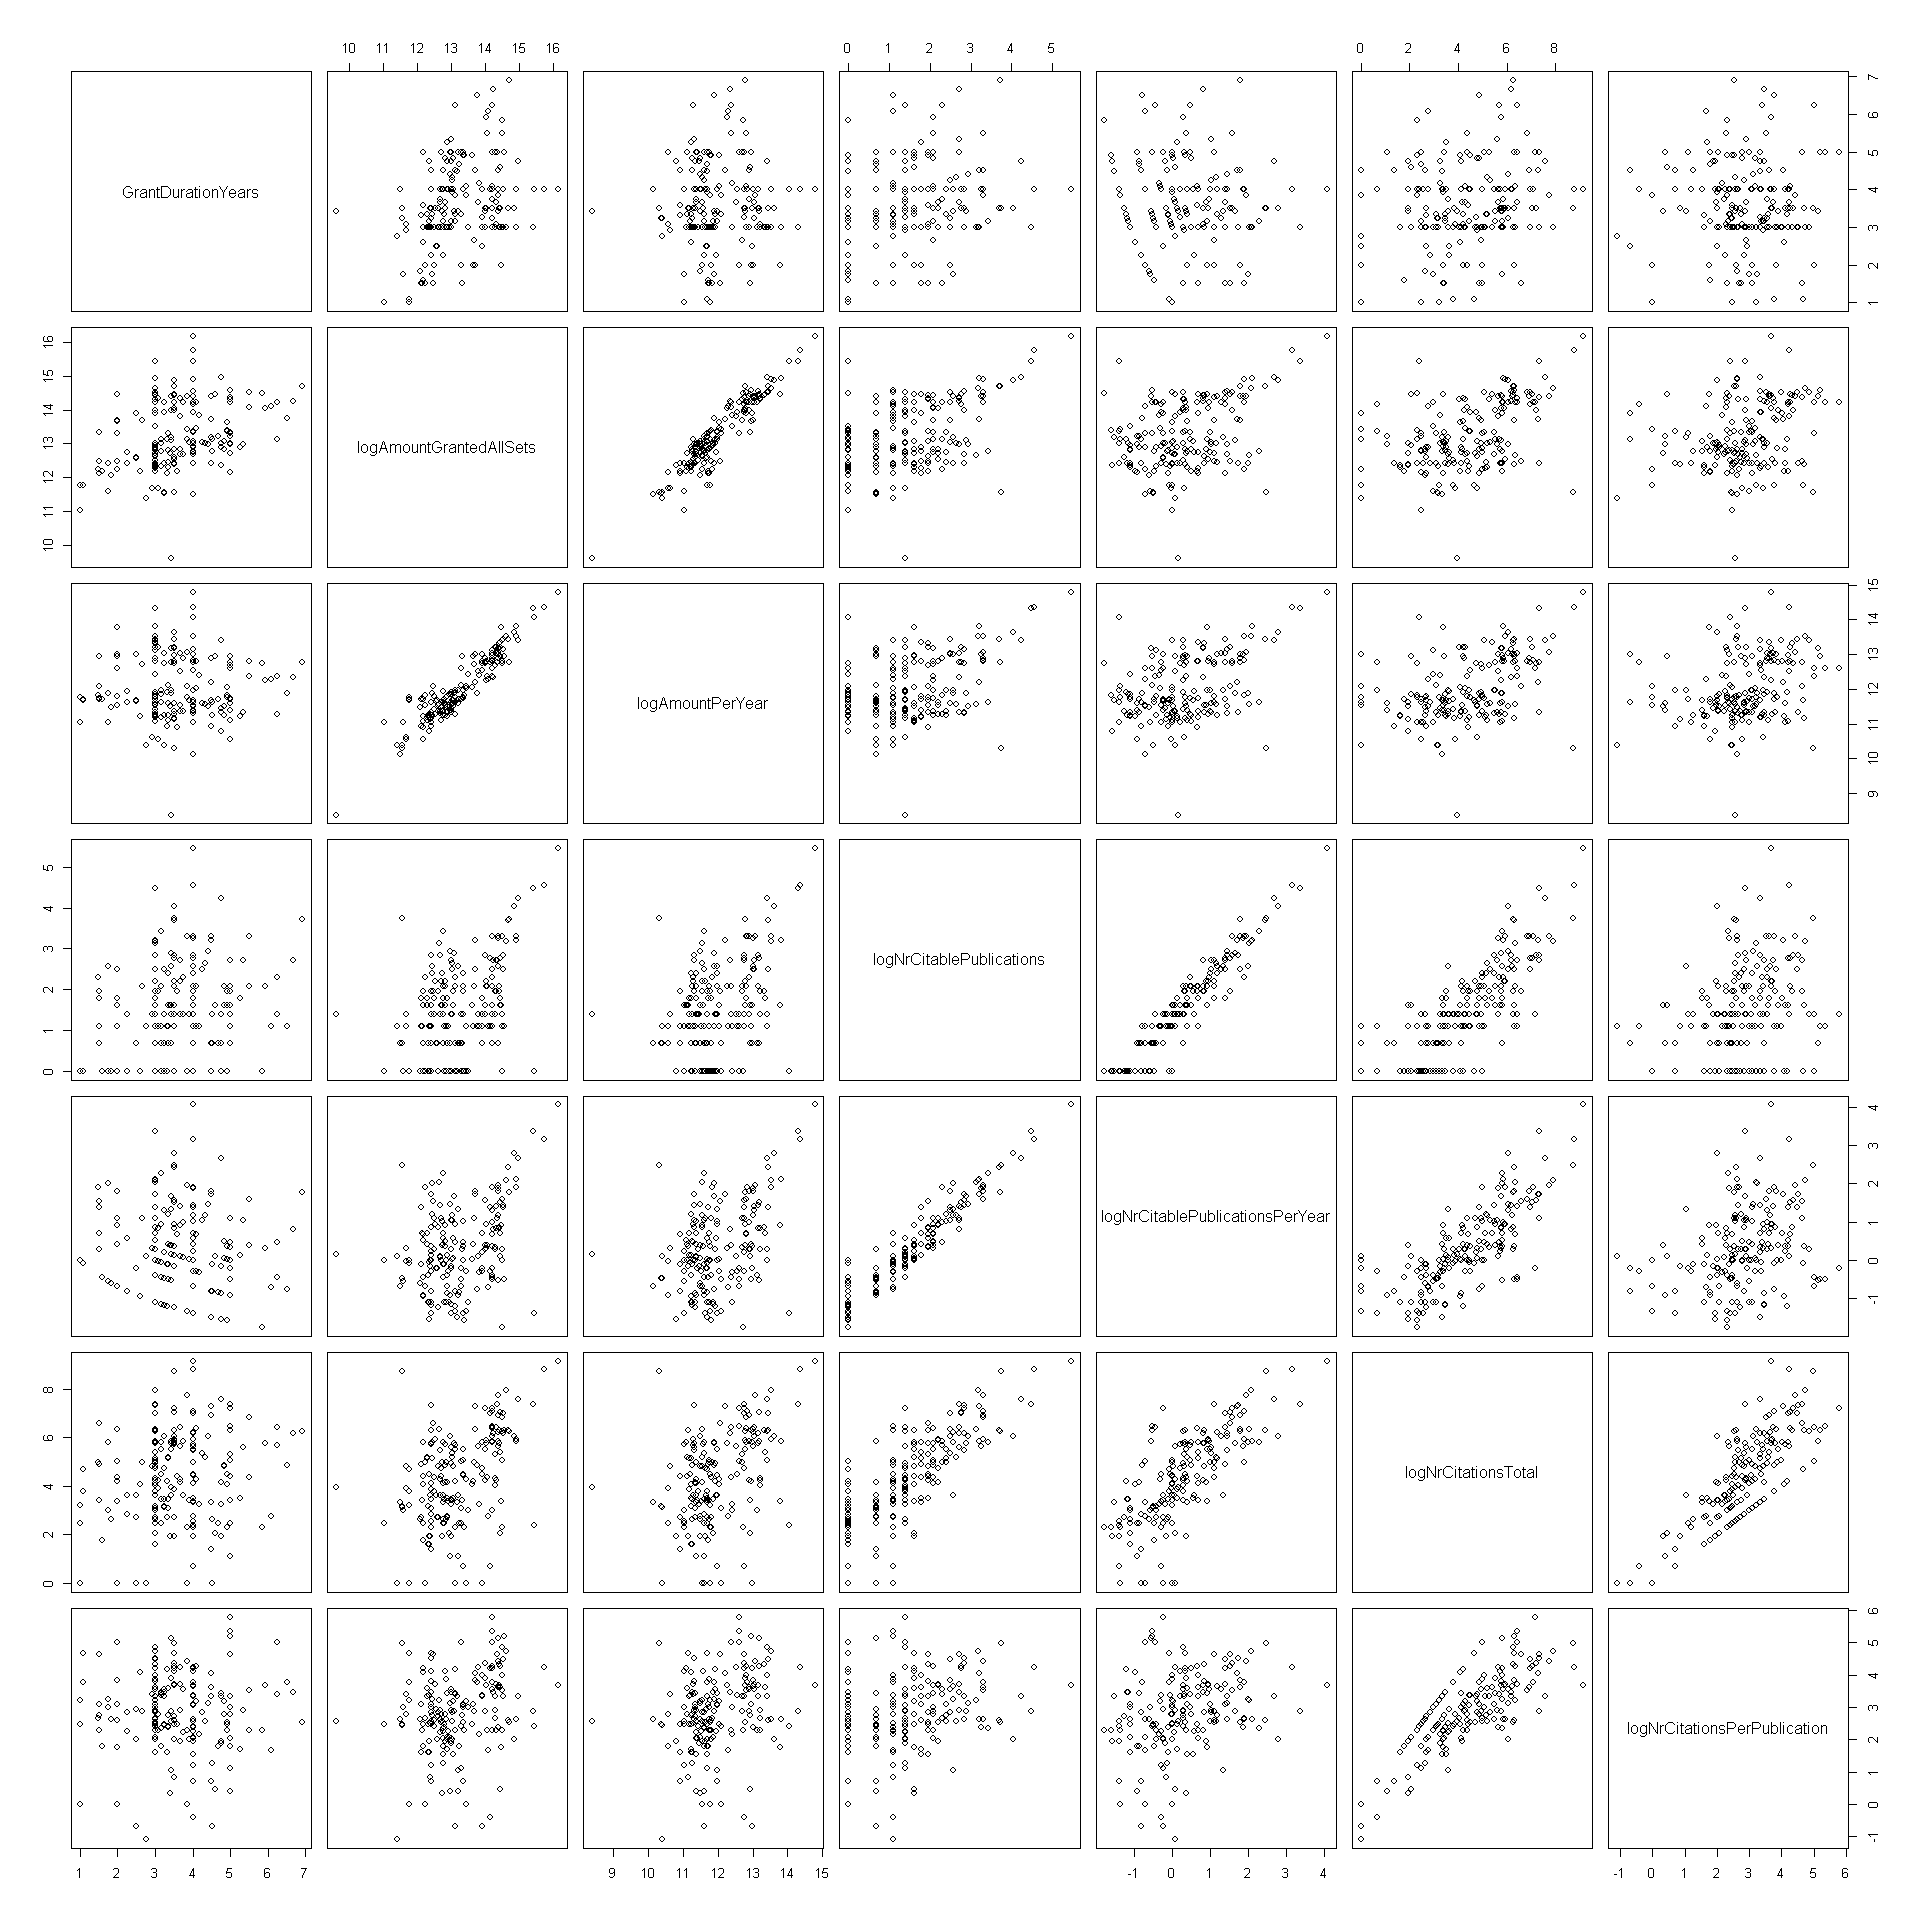

In [752]:
options(repr.plot.width=16, repr.plot.height=16)
pairs(data_numeric.2, cex.labels = 1.2)

Wir beginnen mit der einfachen linearen Regression.


Call:
lm(formula = log(NrCitationsTotal) ~ log(NrCitablePublicationsPerYear), 
    data = programmes)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0663 -0.6945 -0.0172  0.7120  3.5283 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.95226    0.09390   42.09   <2e-16 ***
log(NrCitablePublicationsPerYear)  1.32960    0.08402   15.83   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.224 on 183 degrees of freedom
Multiple R-squared:  0.5778,	Adjusted R-squared:  0.5755 
F-statistic: 250.5 on 1 and 183 DF,  p-value: < 2.2e-16



	studentized Breusch-Pagan test

data:  lm.1
BP = 3.5183, df = 1, p-value = 0.06069


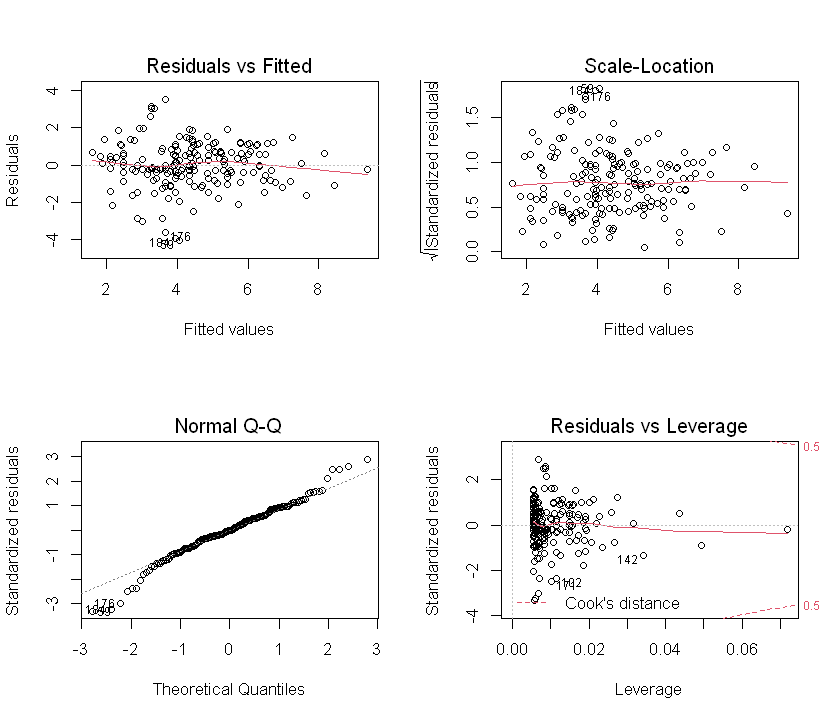

In [818]:
lm.1 <- lm(log(NrCitationsTotal) ~ log(NrCitablePublicationsPerYear), data=programmes)
summary(lm.1)

options(repr.plot.width=7, repr.plot.height=6) # Grösse der Plots festlegen

layout(matrix(c(1,2,3,4),2,2))
plot(lm.1)

# Studentized Breusch-Pagan test
bptest(lm.1)

- Der Intercept und der Koeffizient des Modells sind signifikant (α = 0.05).
- Das einfache Modell erklärt etwa 58% der Variabilität der Daten.
- Der Plot "Residuals vs. Fitted" zeigt keine eindeutige Heteroskedastizität. Ein formaler Breusch-Pagan-Test bestätigt dies. Die Nullhypothese des Tests besagt, dass Homoskedastizität vorliegt. Mit einem p-Wert von 0.06 ist der Test knapp nicht signifikant genug, um die Nullhypothese abzulehnen.
- Der QQ-Plot zeigt jedoch, dass die Residuen nicht ideal normalverteilt sind. Sie weisen längere Tails auf beiden Seiten auf als in einer normalverteilten Verteilung üblich.

Im Folgenden werden wir versuchen, ein verbessertes Modell für die Gesamtanzahl der Zitierungen zu finden, das auf mehreren unabhängigen Variablen basiert. Bei der Bewertung des Modells werden wir die gleichen Kriterien wie bei der einfachen linearen Regression verwenden. Wir gehen davon aus, dass die Residuen möglichst normalverteilt sind und keine Heteroskedastizität vorliegt. Ausserdem sollten die unabhängigen Variablen nicht stark miteinander korrelieren (keine Multikollinearität).

### <a id='toc1_3_2_'></a>[Auswertung](#toc0_)

Da die Zielvariable die Gesamtanzahl der Zitierungen ist, könnte es naheliegend sein, auch die Projektdauer in das Modell einzuschliessen. Der Pair-Plot zeigt jedoch keine deutliche Linearität zwischen der Projektdauer und der Anzahl der Zitierungen. Allerdings ist eine geringfügige Linearität zwischen dem Gesamtförderungsbetrag (gesamt und pro Jahr) und der Gesamtanzahl der Zitierungen erkennbar. Da wir bereits den durchschnittlichen Publikationswert pro Jahr im Modell haben, werden wir als nächstes den durchschnittlichen Förderungsbetrag pro Jahr in das Modell aufnehmen.


Call:
lm(formula = log(NrCitationsTotal) ~ log(NrCitablePublicationsPerYear) + 
    log(AmountPerYear), data = programmes)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9758 -0.6175  0.0227  0.7208  3.3127 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        0.76735    1.27260   0.603    0.547    
log(NrCitablePublicationsPerYear)  1.23308    0.09132  13.503   <2e-16 ***
log(AmountPerYear)                 0.26793    0.10677   2.509    0.013 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.207 on 182 degrees of freedom
Multiple R-squared:  0.5919,	Adjusted R-squared:  0.5874 
F-statistic:   132 on 2 and 182 DF,  p-value: < 2.2e-16



	studentized Breusch-Pagan test

data:  lm.2
BP = 5.1023, df = 2, p-value = 0.07799


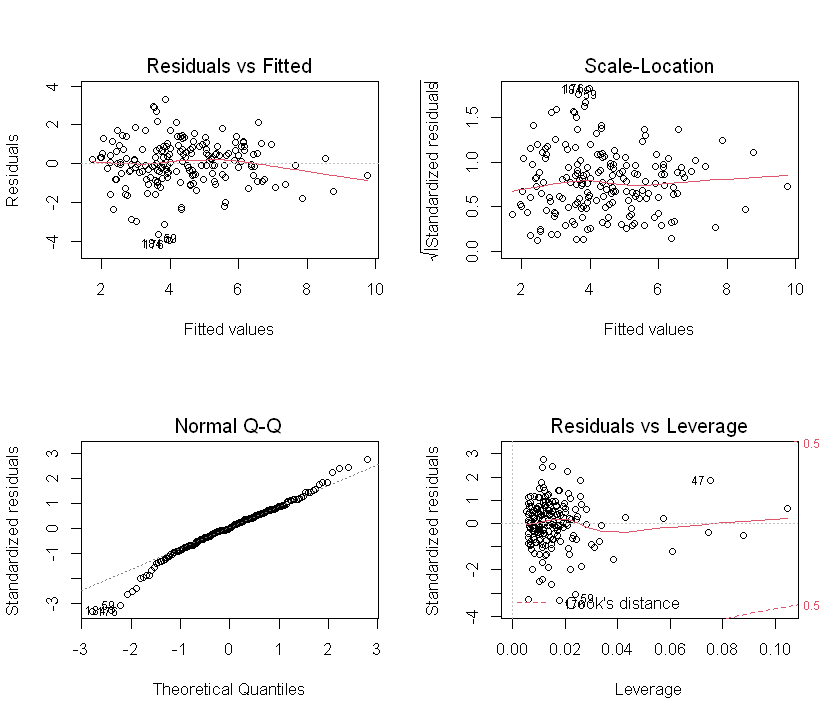

In [819]:
lm.2 <- lm(log(NrCitationsTotal) ~ log(NrCitablePublicationsPerYear) + log(AmountPerYear), data=programmes)
summary(lm.2)

options(repr.plot.width=7, repr.plot.height=6) # Grösse der Plots festlegen

layout(matrix(c(1,2,3,4),2,2))
plot(lm.2)

# Studentized Breusch-Pagan test
bptest(lm.2)

Wir betrachten noch den Zusammenhang zwischen den beiden unabhängigen Variabeln.

In [820]:
cor(log(programmes$NrCitablePublicationsPerYear), log(programmes$AmountPerYear))

[1] 0.4211941

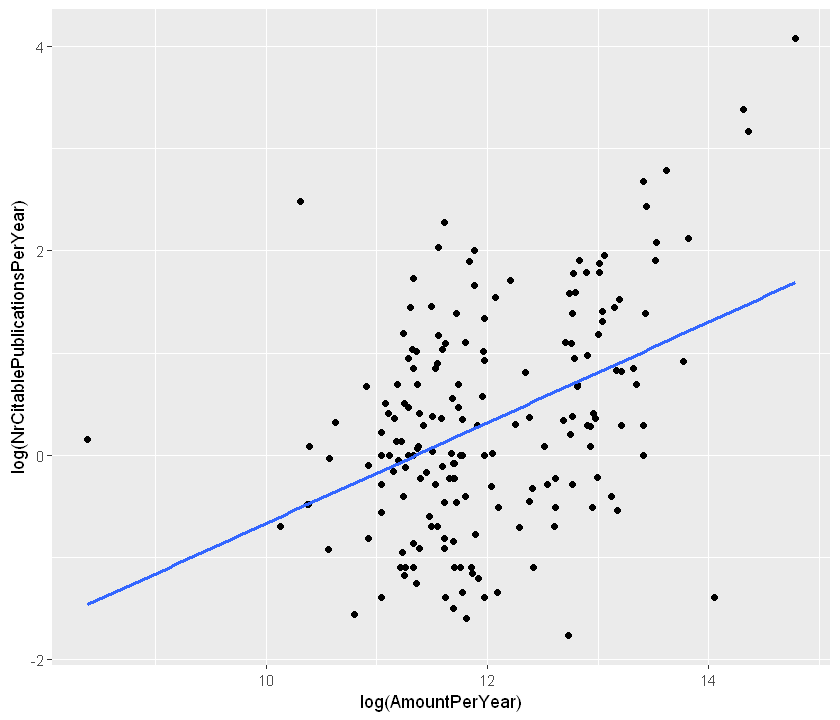

In [821]:
ggplot(programmes, aes(x=log(AmountPerYear), y=log(NrCitablePublicationsPerYear))) +
  geom_point() +
  geom_smooth(method="lm", formula=y ~ x, se=FALSE)

- Beide Koeffizienten sind signifikant (α = 0.05).
- Der Intercept ist nicht mehr signifikant. Dies ist akzeptabel, da wir davon ausgehen müssen, dass ein Projekt ohne Publikationen und ohne Förderungsbetrag keine signifikante Gesamtanzahl an Zitierungen generieren kann.
- Das Gütemass "Adjusted R-squared" hat sich minimal verbessert. Das Modell erklärt etwa 59% der Variabilität in den Daten.
- Es ist keine ausgeprägte Heteroskedastizität erkennbar, was durch den formalen Breusch-Pagan-Test bestätigt wird (der p-Wert ist zu hoch, um die Nullhypothese zu verwerfen). 
- Der QQ-Plot zeigt eine leichte Verbesserung in der Verteilung der Residuen, aber die Tails sind immer noch etwas länger als normal, insbesondere bei niedrigen Werten.
- Obwohl eine gewisse Korrelation zwischen log(NrCitablePublicationsPerYear) und log(AmountPerYear) besteht, betrachten wir sie nicht als extrem genug, um von Multikollinearität zu sprechen.

Im nächsten Schritt schliessen wir noch die kategoriale Variable des Forschungsgebiets mit in das Modell ein. Dabei legen wir "Social Medicine" als Referenz fest.


Call:
lm(formula = log(NrCitationsTotal) ~ log(NrCitablePublicationsPerYear) + 
    log(AmountPerYear) + MainDiscipline_Level2, data = programmes)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7395 -0.6049  0.0683  0.7099  2.7716 

Coefficients:
                                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                                  0.86838    1.24064   0.700 0.484875    
log(NrCitablePublicationsPerYear)            1.26149    0.08882  14.203  < 2e-16 ***
log(AmountPerYear)                           0.22029    0.10607   2.077 0.039252 *  
MainDiscipline_Level2Basic Medical Sciences  0.67381    0.29817   2.260 0.025046 *  
MainDiscipline_Level2Clinical Medicine       0.28798    0.29491   0.977 0.330128    
MainDiscipline_Level2Experimental Medicine   1.07148    0.30190   3.549 0.000495 ***
MainDiscipline_Level2Preventive Medicine     0.10872    0.30467   0.357 0.721641    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' 


	studentized Breusch-Pagan test

data:  lm.3
BP = 10.007, df = 6, p-value = 0.1243


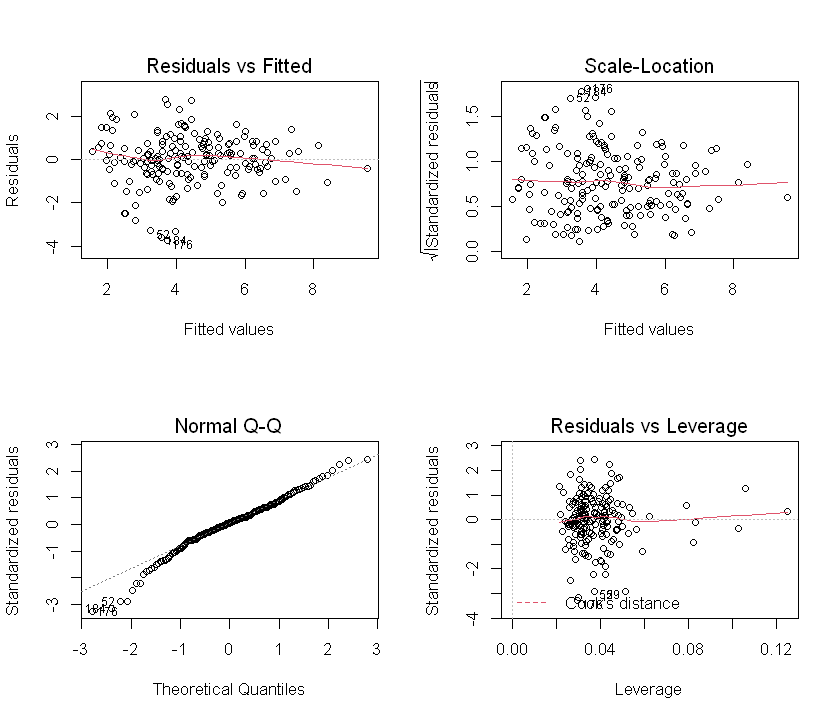

In [822]:
# "Social Medicine" als Referenz-Forschungsgebiet festlegen
programmes$MainDiscipline_Level2 <- relevel(programmes$MainDiscipline_Level2, ref="Social Medicine")

lm.3 <- lm(log(NrCitationsTotal) ~ log(NrCitablePublicationsPerYear) + log(AmountPerYear) + MainDiscipline_Level2, data=programmes)
summary(lm.3)

layout(matrix(c(1,2,3,4),2,2))
plot(lm.3)

# Studentized Breusch-Pagan test
bptest(lm.3)

- Die Koeffizienten im zweiten Modell sind weiterhin signifikant (α = 0.05).
- Der Intercept bleibt nicht signifikant, was wir weiterhin akzeptieren.
- Die Forschungsgebiete "Experimental Medicine" und "Basic Medical Sciences" haben beide einen signifikanten Einfluss auf die Gesamtanzahl der Zitierungen.
- Das Gütemass "Adjusted R-squared" hat sich weiter verbessert. Das Modell erklärt nun etwa 62% der Variabilität in den Daten.
- Es ist kein eindeutiges Muster im Residuals-Plot (Residuals vs. Fitted) erkennbar. Wir können weiterhin von Homoskedastizität ausgehen.
- Die Verteilung der Residuen hat sich weiter in Richtung einer Normalverteilung verbessert, insbesondere für höhere Werte. Bei niedrigen Werten folgen die Residuen jedoch weiterhin nicht einer idealen Normalverteilung. Wir müssen akzeptieren, dass das Modell für niedrige Werte nicht besonders zuverlässig ist.

### <a id='toc1_3_3_'></a>[Interpretation](#toc0_)

Aufgrund des dritten Modells können wir festhalten, dass zur Vorhersage der Gesamtanzahl der Zitierungen, welche die Publikationen eines "Programmes"-Projekts erhalten, die folgende Basisformel verwendet werden kann. Die Basisformel gilt sowohl für Projekte aus dem Forschungsgebiet "Social Medicine" als auch für Projekte aus den Forschungsgebieten "Clinical Medicine" und "Preventive Medicine".

Basisformel: 
```R
log(NrCitationsTotal) = 0.86838 
  + (1.26149 * log(NrCitablePublicationsPerYear)) 
  + (0.22029 * log(AmountPerYear))
```
- Das bedeutet, dass eine Erhöhung der Anzahl der Publikationen pro Jahr (NrCitablePublicationsPerYear) um 1% zu einer Steigerung der Gesamtanzahl der Zitierungen (NrCitationsTotal) um 1.26 % führen würde (`(1.01^1.26149 - 1) * 100`). Eine Erhöhung der jährlichen Publikationen um 10% würde zu einer Steigerung von etwa 12.78 % der Zitierungen führen (`(1.01^0.22029 - 1) * 100`).
- Eine Erhöhung des jährlichen Förderungsbetrags um 1% lässt auf eine Steigerung der Gesamtanzahl der Zitierungen um 0.22 % schliessen (`(1.01^0.22029 - 1) * 100`).

Unter Einbeziehung der Forschungsgebiete "Experimental Medicine" und "Basic Medical Sciences" kann die Basisformel wie folgt erweitert werden:
```R
log(NrCitationsTotal) = 0.86838 
  + (1.26149 * log(NrCitablePublicationsPerYear)) 
  + (0.22029 * log(AmountPerYear))
  + (0.67381 * MainDiscipline_Level2Basic Medical Sciences)
  + (1.07148 * MainDiscipline_Level2Experimental Medicine)
```
- Bei ansonsten gleichbleibenden Werten bezüglich der Anzahl jährlicher Publikationen und des Förderungsbetrags erhöht sich die Gesamtanzahl der Zitierungen bei einem Projekt aus dem Forschungsgebiet "Experimental Medicine" um den Faktor 2.92 (`exp(1.07148)`), im Vergleich zu Projekten aus den Gebieten "Social Medicine", "Clinical Medicine" oder "Preventive Medicine".
- Bei einem Projekt aus dem Gebiet "Basic Medical Sciences" erhöht sich die Gesamtanzahl der Zitierungen immerhin noch um den Faktor 1.96 (`exp(0.67381)`), im Vergleich zu Projekten der Gebiete "Social Medicine", "Clinical Medicine" oder "Preventive Medicine".

Das Modell legt nahe, dass das Forschungsgebiet einen deutlichen Einfluss auf die Zitierungen hat, der weitaus grösser ist als der finanzielle Aspekt des Förderungsbetrags. Im nächsten Kapitel werden wir daher genauer auf die durchschnittliche Anzahl der Zitierungen pro Publikation und die Unterschiede zwischen den einzelnen Forschungsgebieten eingehen.

## <a id='toc1_4_'></a>[Varianzanalyse](#toc0_)

### <a id='toc1_4_1_'></a>[Theoretische Fundierung](#toc0_)
Wir prüfen, ob das Forschungsgebiet einen signifikanten Einfluss (α = 0.05) auf die durchschnittliche Anzahl der Zitierungen pro Publikation hat. Dafür betrachten wir wieder alle Projekte und führen eine Varianzanalyse (ANOVA) durch. Die ANOVA setzt folgende Voraussetzungen voraus, um eine statistisch aussagekräftige Aussage treffen zu können:

- Die abhängige Variable ist intervallskaliert/metrisch.
- Es besteht Varianzhomogenität, das heisst, die Varianz ist innerhalb der verschiedenen Gruppen etwa gleich.
- Die Residuen sind normalverteilt.

Die abhängige Variable, die durchschnittliche Anzahl der Zitierungen pro Publikation, erfüllt die metrische Anforderung. Die anderen beiden Bedingungen werden während der anschliessenden Auswertung getestet.

### <a id='toc1_4_2_'></a>[Auswertung](#toc0_)

Zunächst betrachten wir erneut die statistischen Werte für jedes Forschungsgebiet.

In [823]:
describeBy(log(data$NrCitationsPerPublication), data$MainDiscipline_Level2)


 Descriptive statistics by group 
group: Basic Medical Sciences
   vars   n mean   sd median trimmed  mad   min  max range  skew kurtosis   se
X1    1 658 3.19 1.14   3.22    3.23 1.05 -0.69 6.24  6.94 -0.35     0.26 0.04
------------------------------------------------------------------------------------------ 
group: Clinical Medicine
   vars   n mean   sd median trimmed  mad  min  max range  skew kurtosis   se
X1    1 463 2.74 1.14   2.77    2.79 1.05 -1.1 6.25  7.35 -0.36      0.7 0.05
------------------------------------------------------------------------------------------ 
group: Experimental Medicine
   vars   n mean   sd median trimmed  mad   min  max range  skew kurtosis   se
X1    1 586  3.5 1.07   3.53    3.52 1.03 -0.29 6.62   6.9 -0.16     0.19 0.04
------------------------------------------------------------------------------------------ 
group: Preventive Medicine
   vars   n mean   sd median trimmed  mad   min  max range  skew kurtosis  se
X1    1 166 2.68 1.26   2.81

Im Durchschnitt erhalten Projekte aus dem Forschungsgebiet "Experimental Medicine" die höchste Anzahl an Zitierungen pro Publikation, gefolgt von "Basic Medical Sciences". Das verhält sich also ähnlich wie die Gesamtzahl an Zitierungen für die Projekte des "Programmes"-Förderungsinstruments. Projekte aus den anderen Forschungsgebieten erhalten im Vergleich dazu relativ weniger Zitierungen pro Publikation.

Die Standardabweichungen scheinen nicht deutlich unterschiedlich zwischen den Gruppen zu sein. Dennoch werden wir die Homogenität der Varianzen mit dem formalen Levene-Test überprüfen. Die Nullhypothese des Tests besagt, dass eine Varianzhomogenität besteht.

In [824]:
leveneTest(log(NrCitationsPerPublication) ~ MainDiscipline_Level2, data=data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,4,1.488188,0.2031694
,1918,NA,NA


Der p-Wert des Tests ist nicht signifikant bei einem Signifikanzniveau von 5% (α = 0.05), daher können wir die Nullhypothese nicht ablehnen und von einer Homogenität der Varianzen ausgehen.

Für die eigentliche ANOVA legen wir zunächst "Social Medicine" als das Referenz-Forschungsgebiet im gesamten Datensatz fest und führen dann die ANOVA durch.

In [760]:
data$MainDiscipline_Level2 <- relevel(data$MainDiscipline_Level2, ref="Social Medicine")

                        Df Sum Sq Mean Sq F value Pr(>F)    
MainDiscipline_Level2    4  208.7   52.18   40.64 <2e-16 ***
Residuals             1918 2462.3    1.28                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

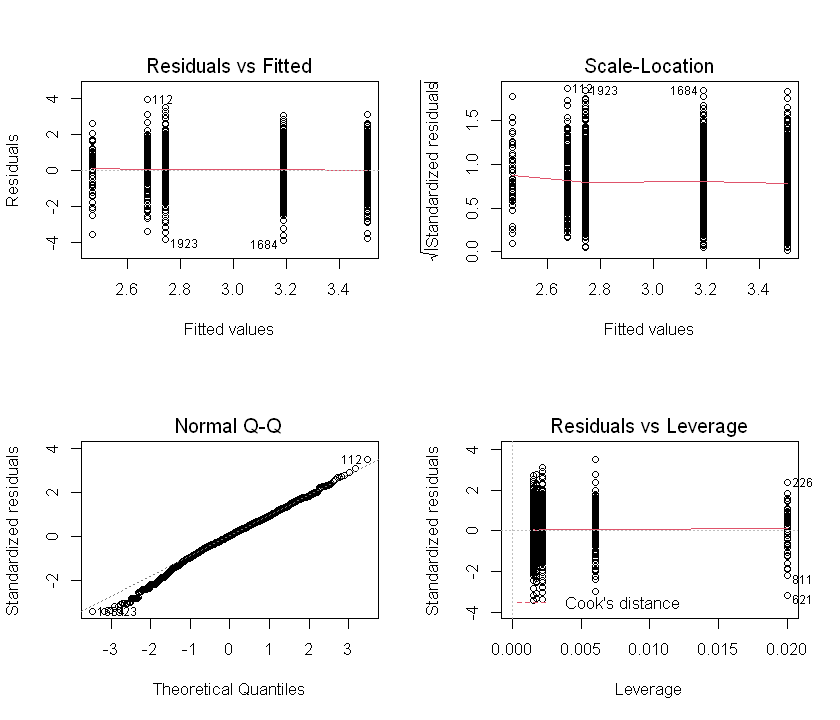

In [825]:
anova <- aov(log(NrCitationsPerPublication) ~ MainDiscipline_Level2, data=data)
summary(anova)

layout(matrix(c(1,2,3,4),2,2))
plot(anova)

- Die ANOVA bestätigt, dass das Forschungsgebiet über den gesamten Datensatz hinweg einen signifikanten Einfluss (α = 0.05) auf die durchschnittliche Anzahl der Zitierungen pro Publikation hat.
- Der QQ-Plot zeigt, dass die Residuen nicht wesentlich von einer Normalverteilung abweichen. Daher können wir die Aussage der ANOVA als statistisch valide anerkennen.

Im Rahmen der multiplen linearen Regression hatte nicht jedes Forschungsgebiet einen signifikanten Einfluss auf die Gesamtanzahl der Zitierungen. Um herauszufinden, welche Forschungsgebiete sich hinsichtlich der durchschnittlichen Anzahl der Zitierungen pro Publikation signifikant unterscheiden, führen wir einen Pairwise t-Test durch. Die Nullhypothese dieses Tests besagt, dass kein signifikanter Unterschied zwischen zwei Gruppen besteht. Bei einem Signifikanzniveau von 5% bedeutet das, dass wir die Nullhypothese verwerfen können, wenn wir p-Werte kleiner als 0,05 erhalten. In diesem Fall können wir davon ausgehen, dass der Unterschied zwischen den beiden Gruppen nicht zufällig ist.

In [826]:
options(width=120)
pairwise.t.test(log(data$NrCitationsPerPublication), data$MainDiscipline_Level2, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  log(data$NrCitationsPerPublication) and data$MainDiscipline_Level2 

                      Basic Medical Sciences Clinical Medicine Experimental Medicine Preventive Medicine
Clinical Medicine     1.2e-09                -                 -                     -                  
Experimental Medicine 1.0e-05                < 2e-16           -                     -                  
Preventive Medicine   2.2e-06                1.00000           1.9e-15               -                  
Social Medicine       0.00016                1.00000           7.4e-09               1.00000            

P value adjustment method: bonferroni 

### <a id='toc1_4_3_'></a>[Interpretation](#toc0_)
Der Pairwise t-Test zeigt, dass die durchschnittliche Anzahl der Zitierungen pro Publikation bei Publikationen aus Projekten der Forschungsgebiete "Basic Medical Sciences" und "Experimental Medicine" signifikant höher ist als bei Publikationen aus Projekten anderer Forschungsgebiete. Darüber hinaus ist auch der Unterschied zwischen "Basic Medical Sciences" und "Experimental Medicine" signifikant. Das bedeutet, dass die Publikationen der Projekte im Forschungsgebiet "Experimental Medicine" im Allgemeinen die höchste durchschnittliche Anzahl an Zitierungen erhalten.

## <a id='toc1_5_'></a>[Logistische Regression](#toc0_)

### <a id='toc1_5_1_'></a>[Theoretische Fundierung](#toc0_)
Nachdem wir festgestellt haben, dass Publikationen von Projekten mit dem Schwerpunkt "Experimental Medicine" im Durchschnitt die höchste Anzahl an Zitierungen pro Publikation erhalten, möchten wir in diesem Kapitel prüfen, ob wir mithilfe einer logistischen Regression ein Modell entwickeln können, das vorhersagt, ob die Publikationen eines "Experimental Medicine"-Projekts insgesamt überdurchschnittlich viele Zitierungen erhalten.

Bei der logistischen Regression sollten folgende Bedingungen erfüllt sein:
- Die abhängige Variable ist binär.
- Es liegen keine extremen Ausreisser für die unabhängigen Variablen vor.
- Es besteht keine Multikollinearität zwischen den unabhängigen Variablen.
- Es besteht ein linearer Zusammenhang zwischen dem Logit der abhängigen Variable und den jeweiligen unabhängigen Variablen.

Für die binäre abhängige Variable werden wir den Datensatz um eine Variable ergänzen, die angibt, ob die Gesamtzahl der Zitierungen über dem Durchschnitt liegt oder nicht. Als unabhängige Variablen verwenden wir die durchschnittliche Anzahl der Publikationen pro Jahr und den jährlichen Förderungsbetrag. Die anderen Bedingungen werden wir im Rahmen der folgenden Auswertung überprüfen.

### <a id='toc1_5_2_'></a>[Auswertung](#toc0_)

In [827]:
# Nach Projekten mit Fokus "Experimental Medicine" filtern
exp_medicine <- data %>% filter(MainDiscipline_Level2 == "Experimental Medicine")
dim(exp_medicine)

[1] 586   9

Wir überprüfen das Vorhandensein von Ausreissern für die beiden unabhängigen Variablen gemäss der "1.5 * IQR"-Regel.

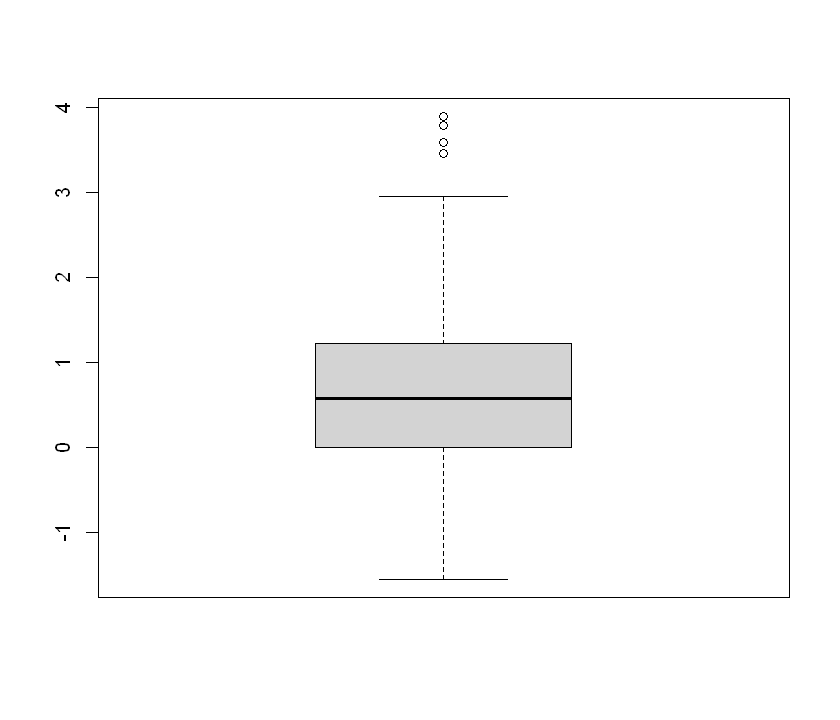

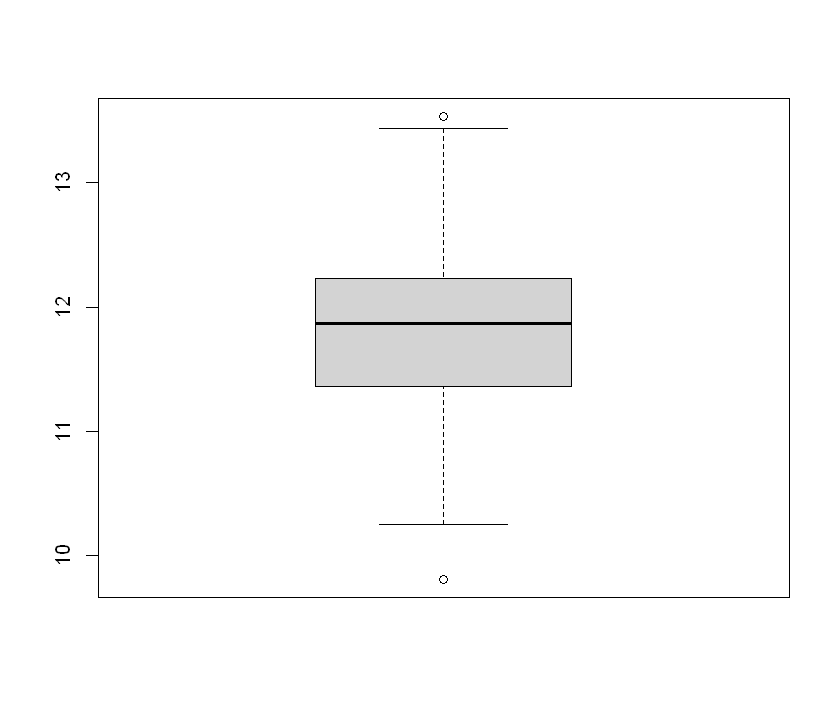

In [828]:
boxplot(log(exp_medicine$NrCitablePublicationsPerYear))
boxplot(log(exp_medicine$AmountPerYear))

Für die logistische Regression werden gemäss der angewandten Regel betfeffen Ausreisser insgesamt sechs Beobachtungen entfernt. 

In [829]:
# Ausreisser entfernen
exp_medicine <- exp_medicine %>%
  filter(log(NrCitablePublicationsPerYear) >= quantile(log(NrCitablePublicationsPerYear), 0.25) - 1.5 * IQR(log(NrCitablePublicationsPerYear))) %>%
  filter(log(NrCitablePublicationsPerYear) <= quantile(log(NrCitablePublicationsPerYear), 0.75) + 1.5 * IQR(log(NrCitablePublicationsPerYear))) %>%
  filter(log(AmountPerYear) >= quantile(log(AmountPerYear), 0.25) - 1.5 * IQR(log(AmountPerYear))) %>%
  filter(log(AmountPerYear) <= quantile(log(AmountPerYear), 0.75) + 1.5 * IQR(log(AmountPerYear)))

Um die binäre Zielvariable abzuleiten, berechnen wir den Mittelwert für die Gesamtanzahl der Zitierungen. Anschliessend fügen wir dem Daten-Subset die binäre Variable "HighlyCited" hinzu. Der Wert dieser Variable ist 1, wenn die beobachtete Gesamtanzahl der Zitierungen höher als der zuvor berechnete Mittelwert ist, andernfalls ist der Wert als 0 codiert.

In [830]:
mean <- mean(log(exp_medicine$NrCitationsTotal))
mean

[1] 5.004064

In [831]:
exp_medicine$HighlyCited <- ifelse(log(exp_medicine$NrCitationsTotal) > mean, 1, 0)

Wir erstellen das Modell für die logistische Regression.

In [832]:
glm.1 <- glm(HighlyCited ~ log(NrCitablePublicationsPerYear) + log(AmountPerYear), data=exp_medicine, family=binomial)
summary(glm.1)


Call:
glm(formula = HighlyCited ~ log(NrCitablePublicationsPerYear) + 
    log(AmountPerYear), family = binomial, data = exp_medicine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2556  -0.6962   0.2161   0.7206   2.5110  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -7.2742     2.0901   -3.48 0.000501 ***
log(NrCitablePublicationsPerYear)   1.9746     0.1711   11.54  < 2e-16 ***
log(AmountPerYear)                  0.5358     0.1768    3.03 0.002448 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 802.70  on 579  degrees of freedom
Residual deviance: 536.58  on 577  degrees of freedom
AIC: 542.58

Number of Fisher Scoring iterations: 5


Die Koeffizienten beider Variablen sind signifikant (α = 0.05), wobei es den Anschein hat, dass die Anzahl der Publikationen pro Jahr einen deutlich stärkeren Einfluss auf die Wahrscheinlichkeit einer überdurchschnittlichen Gesamtzahl an Zitierungen hat.

Wir prüfen nun eher informell, ob zwischen den unabhängigen Variablen eine hohe Korrelation besteht.

In [833]:
cor(log(exp_medicine$NrCitablePublicationsPerYear), log(exp_medicine$AmountPerYear))

[1] 0.2251484

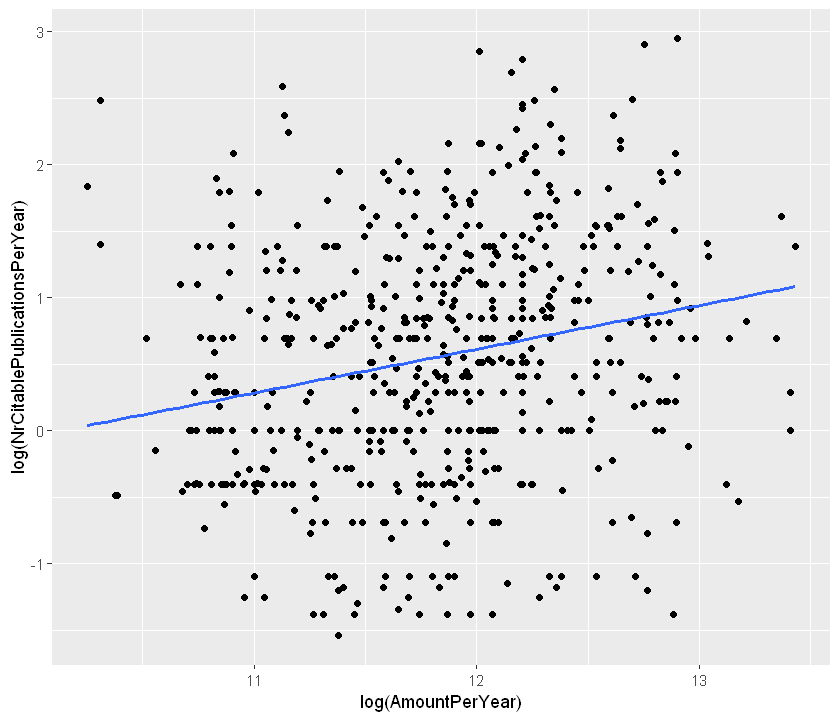

In [835]:
ggplot(exp_medicine, aes(x=log(AmountPerYear), y=log(NrCitablePublicationsPerYear))) +
  geom_point() +
  geom_smooth(method="lm", formula=y ~ x, se=FALSE)

- Der Korrelationskoeffizient zwischen den unabhängigen Variablen ist nicht besonders hoch.
- Dies wird auch durch das Streudiagramm bestätigt. Es gibt keine Anzeichen für eine extreme Multikollinearität zwischen den unabhängigen Variablen.

Basierend auf dem erstellten Modell berechnen wir die Wahrscheinlichkeit einer überdurchschnittlich hohen Anzahl von Zitierungen für jede Beobachtung in unserem Daten-Subset.

In [836]:
probabilities <- glm.1 %>% predict(exp_medicine, type="response")

Wir ergänzen die Daten um eine Variable für den Logit jeder Beobachtung, wobei der Logit der natürliche Logarithmus für das Verhältnis der Wahrscheinlichkeit für HighlyCited == 1 zur Wahrscheinlichkeit HighlyCited == 0 ist.

In [837]:
exp_medicine <- exp_medicine %>% 
  mutate(logit=log(probabilities / (1 - probabilities)))

Um die Annahme der Linearität zwischen den unabhängigen Variablen und dem Logit zu überprüfen, erstellen wir zwei Streudiagramme zur visuellen Analyse.

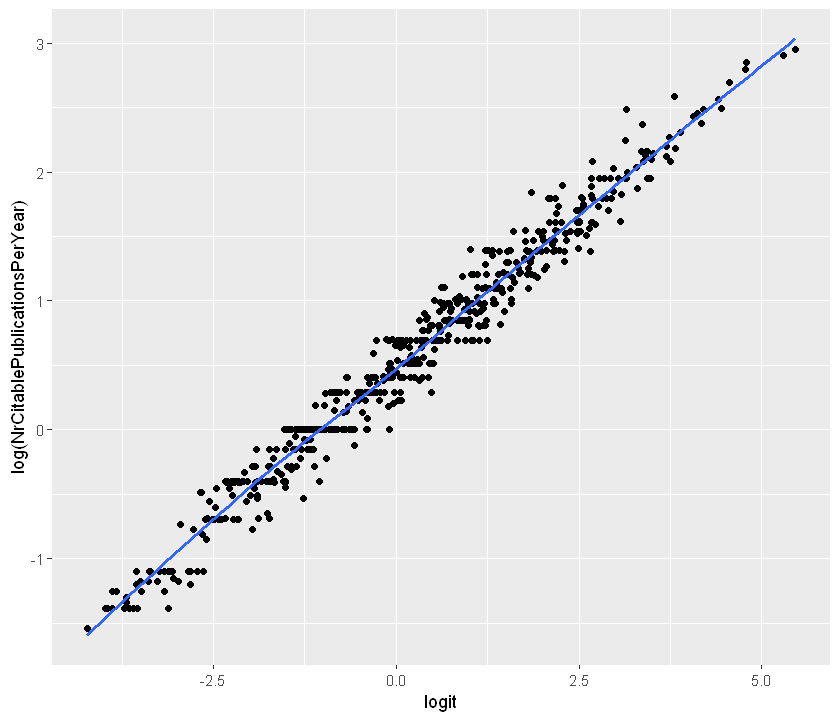

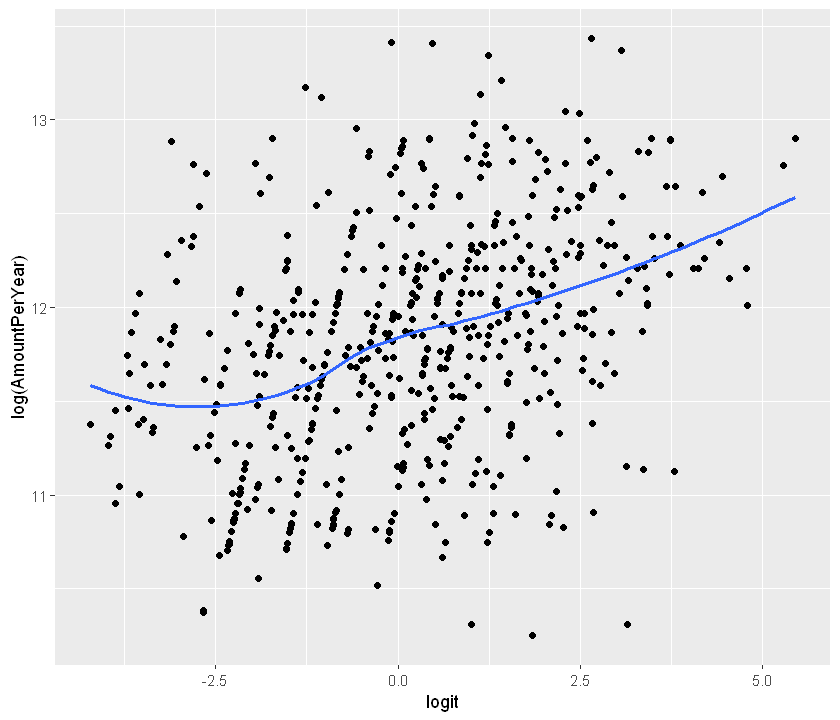

In [839]:
ggplot(exp_medicine, aes(x=logit, y=log(NrCitablePublicationsPerYear))) +
  geom_point() +
  geom_smooth(method="loess", formula=y ~ x, se=FALSE)

ggplot(exp_medicine, aes(x=logit, y=log(AmountPerYear))) +
  geom_point() +
  geom_smooth(method="loess", formula=y ~ x, se=FALSE)

Die Linearität zwischen dem Logit und der durchschnittlichen Anzahl von Publikationen pro Jahr ist deutlich erkennbar. Hingegen lässt sich kein deutlicher linearer Zusammenhang zwischen dem Logit und dem Förderungsbetrag pro Jahr feststellen. Angesichts der geringeren Einflussstärke des Förderungsbetrags in unserem Modell, entfernen wir diese Variable und führen eine einfache logistische Regression durch, die nur die Anzahl von Publikationen pro Jahr berücksichtigt.

In [840]:
glm.2 <- glm(HighlyCited ~ log(NrCitablePublicationsPerYear), data=exp_medicine, family=binomial)
summary(glm.2)


Call:
glm(formula = HighlyCited ~ log(NrCitablePublicationsPerYear), 
    family = binomial, data = exp_medicine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1474  -0.7996   0.2226   0.7625   2.7660  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -0.9763     0.1372  -7.118  1.1e-12 ***
log(NrCitablePublicationsPerYear)   2.0393     0.1707  11.949  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 802.70  on 579  degrees of freedom
Residual deviance: 545.92  on 578  degrees of freedom
AIC: 549.92

Number of Fisher Scoring iterations: 5


Bei der einfachen logistischen Regression besteht die Möglichkeit, die Daten und das Modell auch visuell darzustellen.

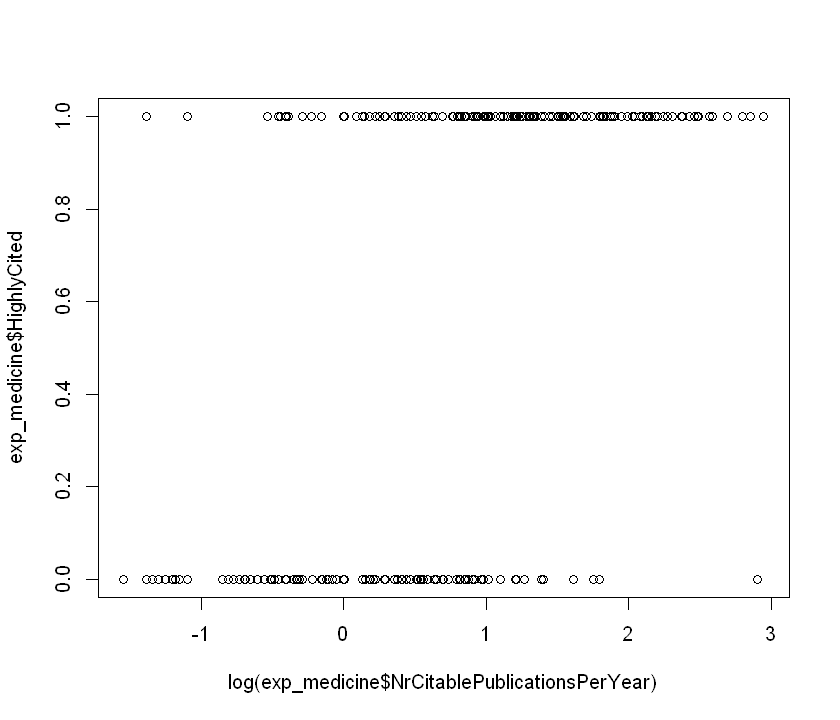

In [841]:
plot(log(exp_medicine$NrCitablePublicationsPerYear), exp_medicine$HighlyCited)

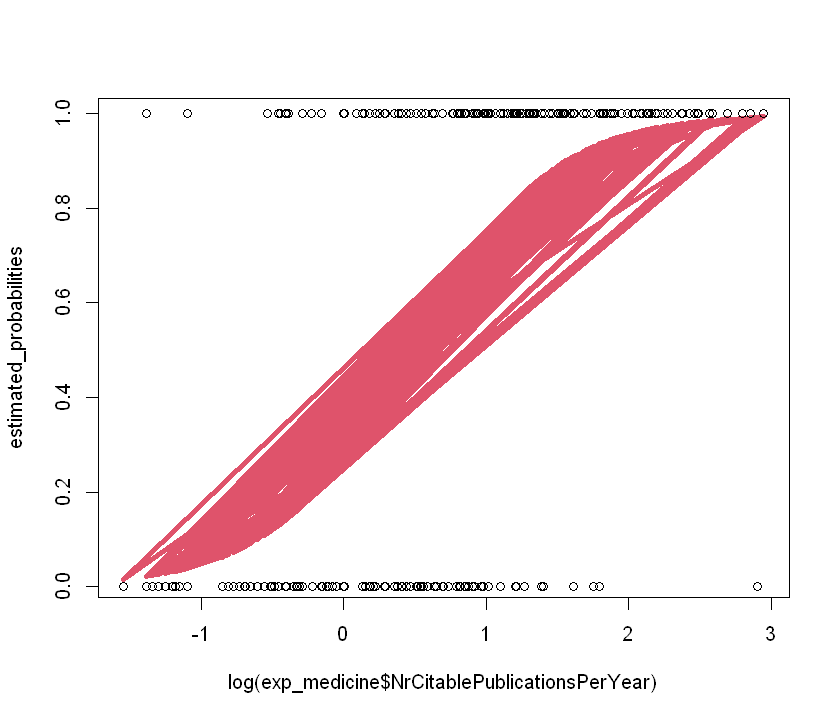

In [842]:
estimated_probabilities <- glm.2$fitted.values

plot(log(exp_medicine$NrCitablePublicationsPerYear), estimated_probabilities, type="l", lwd=4, col=2)
lines(log(exp_medicine$NrCitablePublicationsPerYear), exp_medicine$HighlyCited, col=1, type="p")

Die mehrfachen Regressionslinien deuten darauf hin, dass bestimmte Werte der unabhängigen Variable mehrfach auftreten und unterschiedliche Werte der abhängigen Variable aufweisen. Um die logistische Regression visuell ansprechend darzustellen, behalten wir nur eindeutige Werte der unabhängigen Variable und berechnen den Mittelwert der abhängigen Variable für jeden Wert. Basierend darauf erstellen wir ein drittes Modell.

In [843]:
# Duplikate entfernen und Mittelwerte berechnen
unique_exp_medicine <- exp_medicine %>% 
  group_by(NrCitablePublicationsPerYear) %>%
  summarize(meanNrCitationsTotal=mean(NrCitationsTotal))

# Mittelwert für Erstellen der binären Variable berechnen
mean <- mean(log(unique_exp_medicine$meanNrCitationsTotal))

# Binäre Variable erstellen
unique_exp_medicine$HighlyCited <- ifelse(log(unique_exp_medicine$meanNrCitationsTotal) > mean, 1, 0)

dim(unique_exp_medicine)

[1] 266   3

In [844]:
glm.3 <- glm(HighlyCited ~ log(NrCitablePublicationsPerYear), data=unique_exp_medicine, family=binomial)
summary(glm.3)


Call:
glm(formula = HighlyCited ~ log(NrCitablePublicationsPerYear), 
    family = binomial, data = unique_exp_medicine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9602  -0.6688   0.2495   0.7284   2.2497  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -1.3851     0.2475  -5.597 2.18e-08 ***
log(NrCitablePublicationsPerYear)   1.9813     0.2439   8.122 4.58e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 367.25  on 265  degrees of freedom
Residual deviance: 244.48  on 264  degrees of freedom
AIC: 248.48

Number of Fisher Scoring iterations: 5


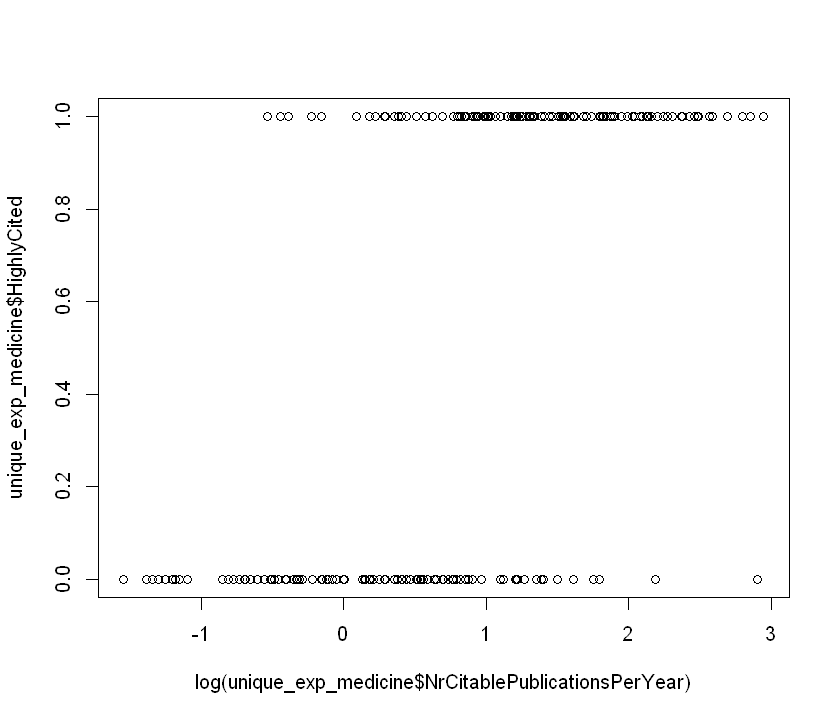

In [845]:
plot(log(unique_exp_medicine$NrCitablePublicationsPerYear), unique_exp_medicine$HighlyCited)

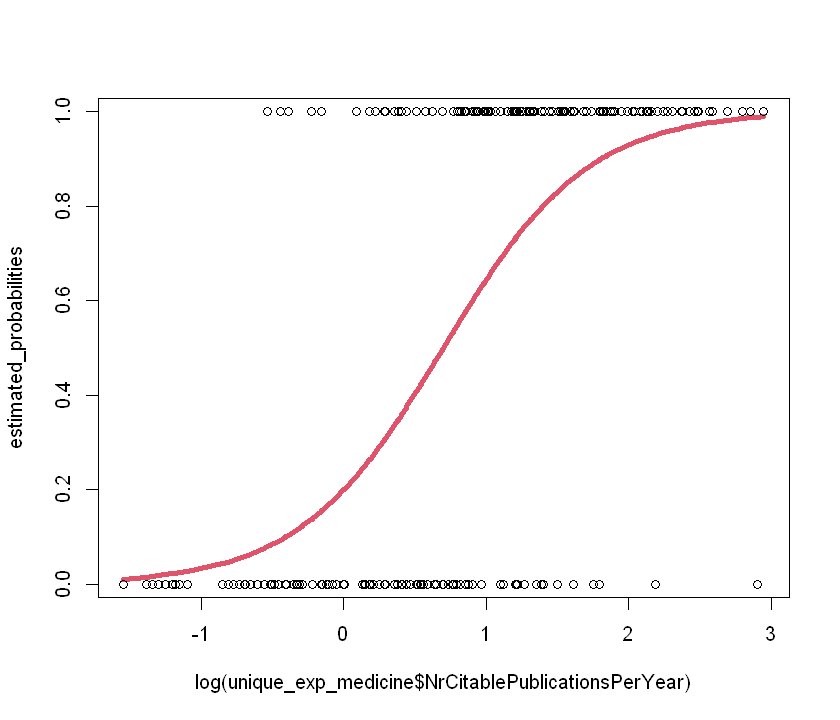

In [846]:
estimated_probabilities <- glm.3$fitted.values

plot(log(unique_exp_medicine$NrCitablePublicationsPerYear), estimated_probabilities, type="l", lwd=4, col=2)
lines(log(unique_exp_medicine$NrCitablePublicationsPerYear), unique_exp_medicine$HighlyCited, col=1, type="p")

Wir überprüfen den Wert von log(NrCitablePublicationsPerYear), der gerade über der berechneten Wahrscheinlichkeit von 0.5 für eine überdurchschnittliche Anzahl an Zitierungen liegt.

In [847]:
perdicted_probabilities <- predict(glm.3, type="response")
threshold_value <- with(unique_exp_medicine, log(NrCitablePublicationsPerYear)[perdicted_probabilities > 0.5][1])
threshold_value

[1] 0.7343973

### <a id='toc1_5_3_'></a>[Interpretation](#toc0_)

Das finale Modell zeigt, dass eine Erhöhung um eine Einheit in der logarithmierten Anzahl der Publikationen pro Jahr (log(NrCitablePublicationsPerYear)) die Wahrscheinlichkeit, eine überdurchschnittliche Anzahl an Zitierungen zu erhalten, um das Siebenfache erhöht (`exp(1.9813) = 7.2522`). Bezogen auf die Originaldaten bedeutet dies, dass zusätzliche 2.7 Publikationen pro Jahr (exp(1) = 2.7183) erforderlich sind, um die Wahrscheinlichkeit für eine überdurchschnittliche Anzahl an Zitierungen entsprechend zu erhöhen.

Darüber hinaus zeigt sich, dass Projekte mit Schwerpunkt "Experimental Medicine" mindestens 2.08 Publikationen pro Jahr benötigen (`exp(0.7344)`), um insgesamt eine überdurchschnittliche Anzahl an Zitierungen zu erzielen.

## <a id='toc1_6_'></a>[Zusammenfassung](#toc0_)
Der generierte und analysierte Datensatz ermöglicht folgende Schlussfolgerungen:

- Der Förderungsbetrag der Projekte spielt eine eher untergeordnete Rolle für die Zitierungen, welche die Publikationen der Projekte erhalten. Dennoch ist er besonders im Kontext der Projekte des Förderungsinstruments "Programmes" und der Gesamtanzahl der Zitierungen nicht völlig zu vernachlässigen.
- Die wesentlichen Faktoren, welche die Anzahl der Zitierungen beeinflussen, sind einerseits die durchschnittliche Anzahl der jährlich veröffentlichten Publikationen und andererseits das Forschungsgebiet. Publikationen im Forschungsgebiet "Experimental Medicine" erhalten die meisten Zitierungen.
- Innerhalb der Projekte mit Schwerpunkt "Experimental Medicine" erhalten die Projekte insgesamt überdurchschnittlich viele Zitierungen, wenn sie mindestens 2.7 Publikationen pro Jahr veröffentlichen.

Abschliessend lässt sich sagen, dass der geringe Einfluss des Förderungsbetrags möglicherweise auch durch das Forschungsgebiet erklärt werden kann. Es ist denkbar, dass Forschung im Bereich "Experimental Medicine" teurer ist und gleichzeitig die meisten Zitierungen generiert werden. Um dies genauer zu untersuchen, sind weitere Analysen erforderlich.


**Hinweis**:  
Teile der Ergebnisse dieser Semesterarbeit sind auf der folgenden Website visualisiert: [Does Money Buy Citations?](https://cyrill-martin.github.io/money-and-citations/)